### Imports


In [110]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

import os 
import numpy as np 
import matplotlib.pyplot as plt
import copy
import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

meas = 'silicon-scalinq-temp'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import yaml

with open('resonator_meas.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

print(sample)
ind = sample_dict[sample]['meas'].index(meas)
print(ind)
data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']


silicon-scalinq_temp
0


In [112]:
sample_dict[sample]

{'atten': -65,
 'dir': [['temp_61mK',
   'temp_101mK',
   'temp_139mK',
   'temp_189mK',
   'temp_229mK',
   'temp_274mK',
   'temp_332mK',
   'temp_568mK']],
 'flip': True,
 'max_power': 20,
 'meas': ['silicon-scalinq-temp'],
 'meas_type': ['vna'],
 'min_power': -100,
 'nfiles': [3],
 'pitch': [10, 12, 14, 2, 16, 4, 6, 8],
 'pth': '240925-ResTempSweep/',
 'target_freq': [5.9, 6.2, 6.5, 7, 6.7, 7.2, 7.5, 7.9]}

## Sweep power/temp, plot results

### Run sweep 

Counter({6336548: 6, 6692444: 6, 5516761: 6, 7056424: 6, 5820847: 6, 6091772: 6, 6376981: 6, 7382930: 6})
Counter({6336548: 6, 6692444: 6, 5516761: 6, 7056424: 6, 5820847: 6, 6091772: 6, 6376981: 6, 7382930: 6})
['res_5516761_60dbm_wide1', 'res_5516761_50dbm_wide1', 'res_5516761_40dbm_wide1', 'res_5516761_30dbm_wide1', 'res_5516761_20dbm_wide1', 'res_5516761_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  2.0858030319213867
['res_5820847_60dbm_wide1', 'res_5820847_50dbm_wide1', 'res_5820847_40dbm_wide1', 'res_5820847_30dbm_wide1', 'res_5820847_20dbm_wide1', 'res_5820847_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  4.190159797668457
['res_6091772_60dbm_wide1', 'res_6091772_50dbm_wide1', 'res_6091772_40dbm_wide1', 'res_6091772_30dbm_wide1', 'res_6091772_20dbm_wide1', 'res_6091772_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0


Time elapsed:  5.9704978466033936
['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0


Time elapsed:  8.180250883102417
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  10.26205587387085
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  13.86809492111206
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  15.664657831192017
['res_7382930_60dbm_wide1', 'res_7382930_50dbm_wide1', 'res_7382930_40dbm_wide1', 'res_7382930_30dbm_wide1', 'res_7382930_20dbm_wide1', 'res_7382930_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  17.326535940170288
Counter({6336548: 6, 6692444: 6, 5516

Time elapsed:  4.75928807258606
['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
-60.0


-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  6.303988933563232
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  8.225402116775513
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  9.995751142501831
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0


Time elapsed:  12.14850902557373
['res_7382930_60dbm_wide1', 'res_7382930_50dbm_wide1', 'res_7382930_40dbm_wide1', 'res_7382930_30dbm_wide1', 'res_7382930_20dbm_wide1', 'res_7382930_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  14.142518043518066
Counter({6336548: 6, 6692444: 6, 5516761: 6, 7056424: 6, 5820847: 6, 6091772: 6, 6376981: 6, 7382930: 6})
['res_5516761_60dbm_wide1', 'res_5516761_50dbm_wide1', 'res_5516761_40dbm_wide1', 'res_5516761_30dbm_wide1', 'res_5516761_20dbm_wide1', 'res_5516761_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  2.289243221282959
['res_5820847_60dbm_wide1', 'res_5820847_50dbm_wide1', 'res_5820847_40dbm_wide1', 'res_5820847_30dbm_wide1', 'res_5820847_20dbm_wide1', 'res_5820847_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  4.645265817642212
['res_6091772_60dbm_wide1', 'res_6091772_50dbm_wide1', 'res_6091772_40dbm_wide1', 'res_6091772_30dbm_wide1', 'res_6091772_20dbm_wide1', 'res_6091772_10dbm_wide1']
-

Time elapsed:  6.883306980133057
['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
-60.0


-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  8.85283613204956
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0


/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Python/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_resonator.py:191: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2,1, figsize=(6,7.5), sharex=True)


Time elapsed:  10.992295980453491
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  12.798357963562012
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0


Time elapsed:  14.613659143447876
['res_7382930_60dbm_wide1', 'res_7382930_50dbm_wide1', 'res_7382930_40dbm_wide1', 'res_7382930_30dbm_wide1', 'res_7382930_20dbm_wide1', 'res_7382930_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  16.2971351146698
Counter({6336548: 6, 6692444: 6, 5516761: 6, 7056424: 6, 5820847: 6, 6091772: 6, 6376981: 6, 7382930: 6})
['res_5516761_60dbm_wide1', 'res_5516761_50dbm_wide1', 'res_5516761_40dbm_wide1', 'res_5516761_30dbm_wide1', 'res_5516761_20dbm_wide1', 'res_5516761_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  1.8083257675170898
['res_5820847_60dbm_wide1', 'res_5820847_50dbm_wide1', 'res_5820847_40dbm_wide1', 'res_5820847_30dbm_wide1', 'res_5820847_20dbm_wide1', 'res_5820847_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  3.403186798095703
['res_6091772_60dbm_wide1', 'res_6091772_50dbm_wide1', 'res_6091772_40dbm_wide1', 'res_6091772_30dbm_wide1', 'res_6091772_20dbm_wide1', 'res_6091772_10dbm_wide1']
-

Time elapsed:  5.44450306892395
['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
-60.0


-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  6.9914398193359375
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  8.454877853393555
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  9.972011089324951
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  11.500832080841064
['res_7382930_60dbm_wide1', 'res_7382930_50dbm_wide1', 'res_7382930_40dbm_wide1', 'res_7382930_30dbm_wide1', 'res_7382930_20dbm_wide1', 'res_7382930_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  13.177280902862549
Counte

Time elapsed:  4.538586139678955
['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  6.043641090393066
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  8.145084142684937
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  9.970516920089722
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  11.744378089904785
['res_7382930_60dbm_wide1', 'res_73829

Time elapsed:  4.6453728675842285
['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  6.16580605506897
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  7.602817058563232
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  9.0516939163208
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
Time elapsed:  11.05095911026001
['res_7382930_60dbm_wide1', 'res_7382930_

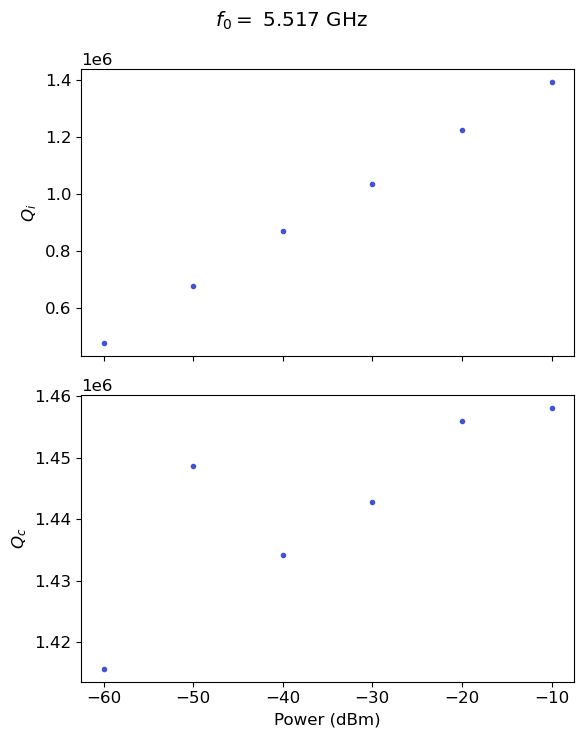

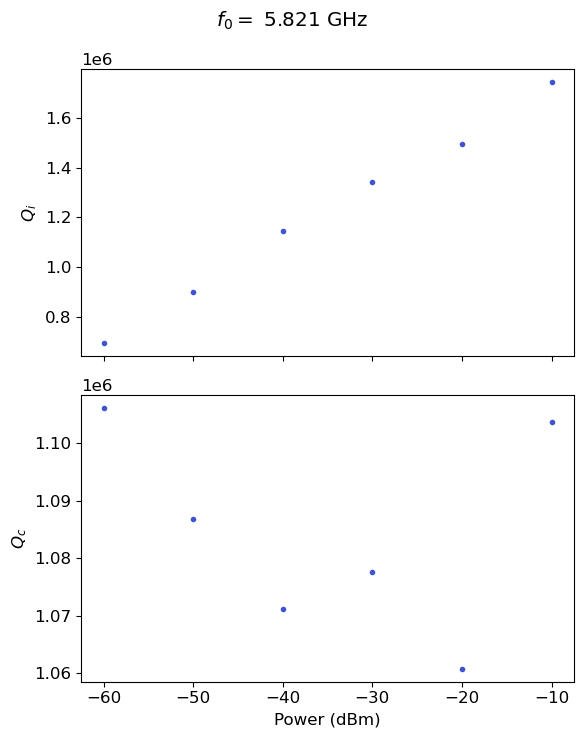

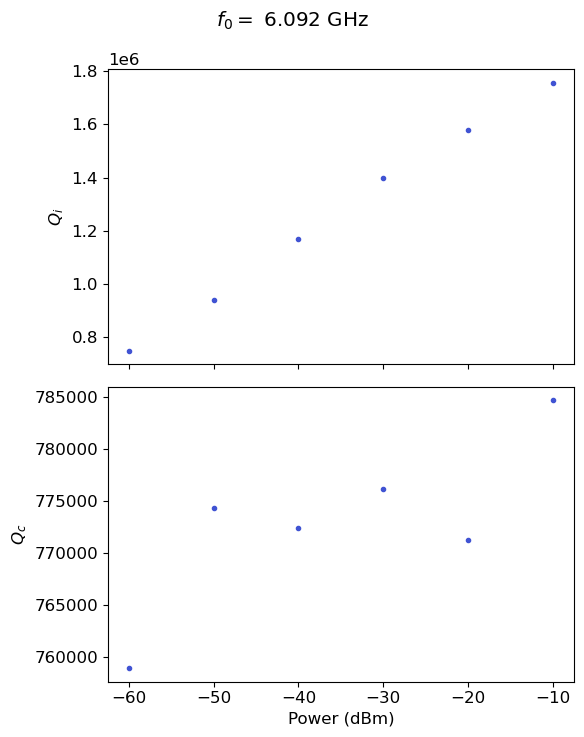

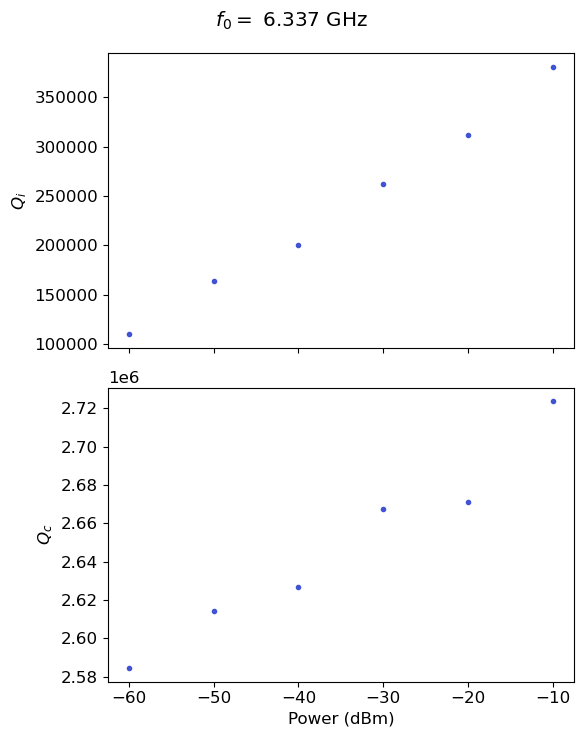

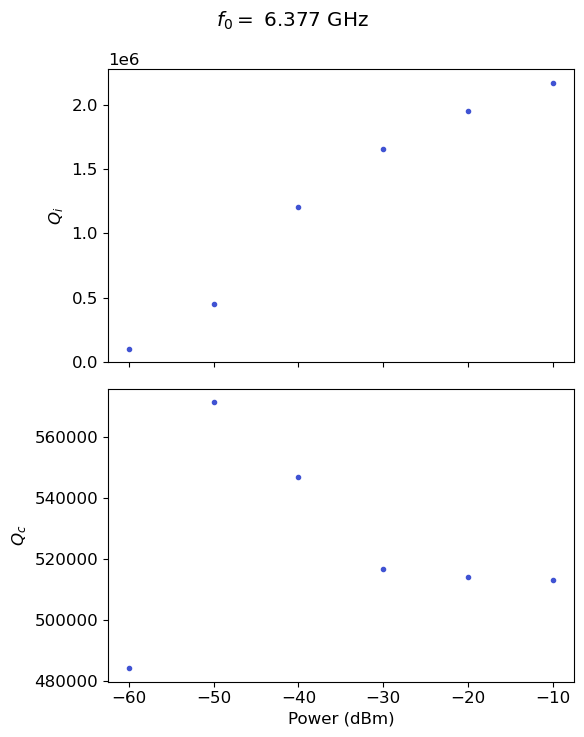

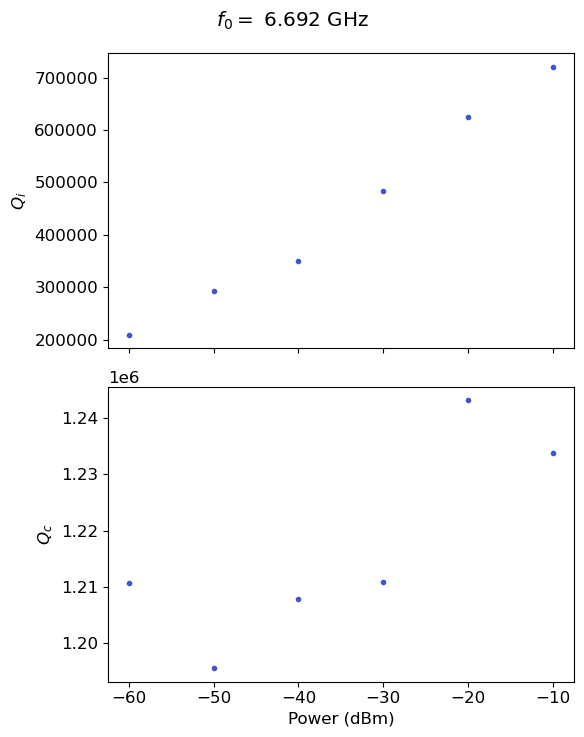

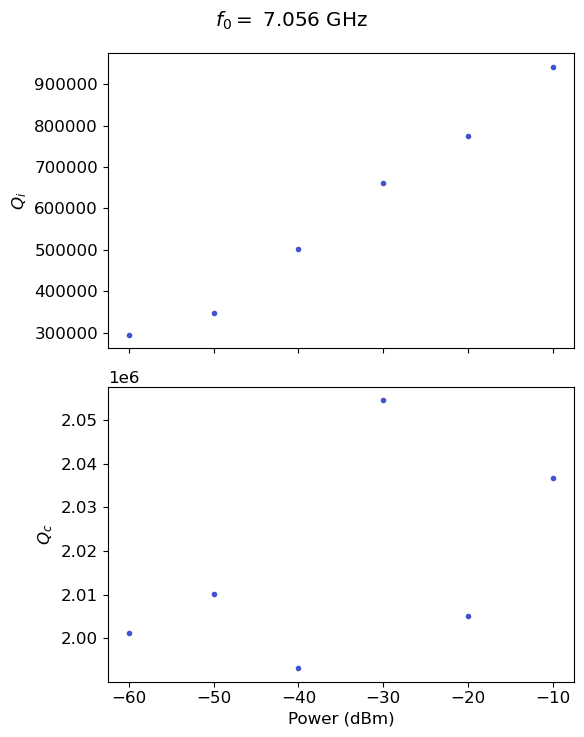

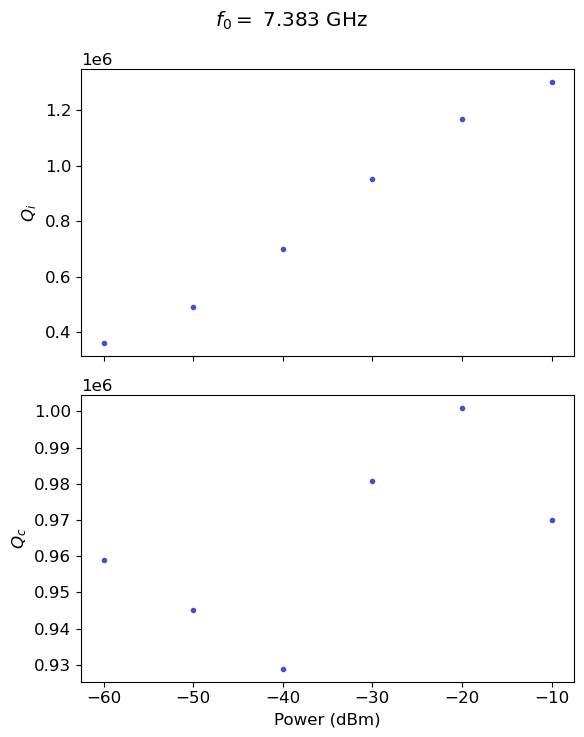

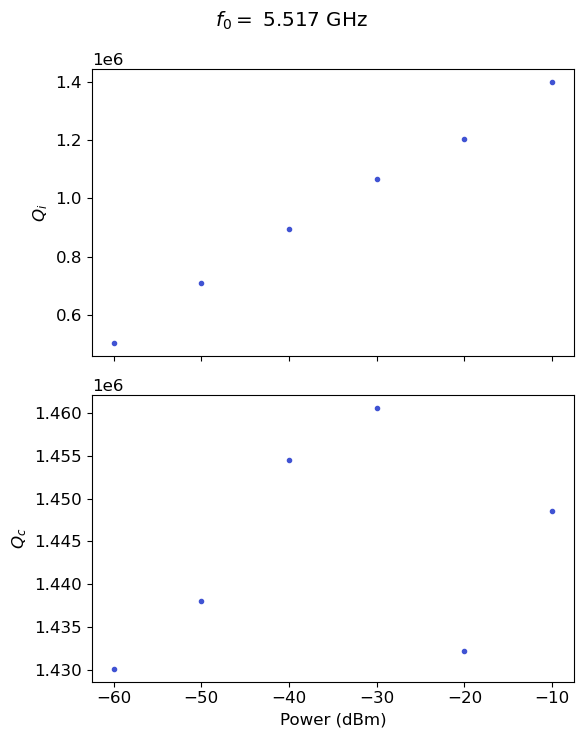

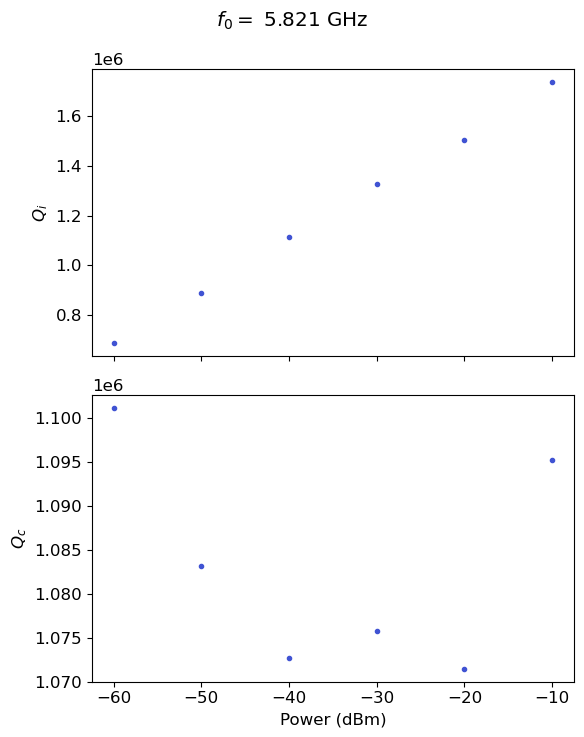

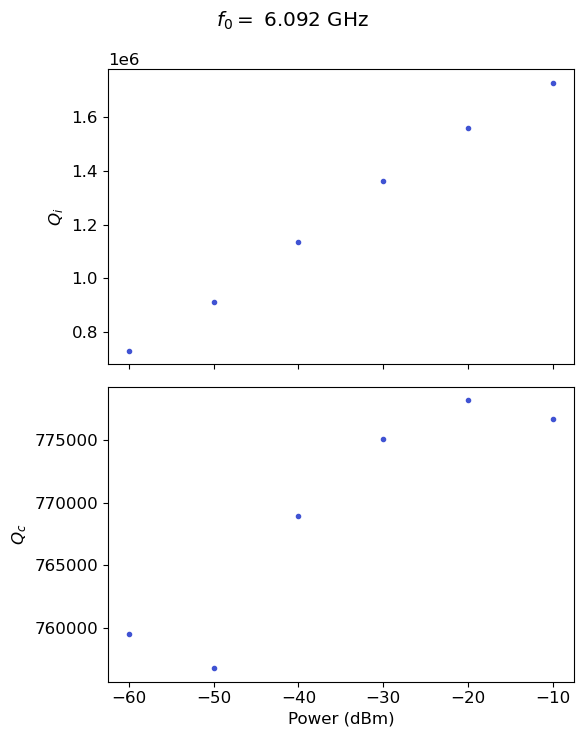

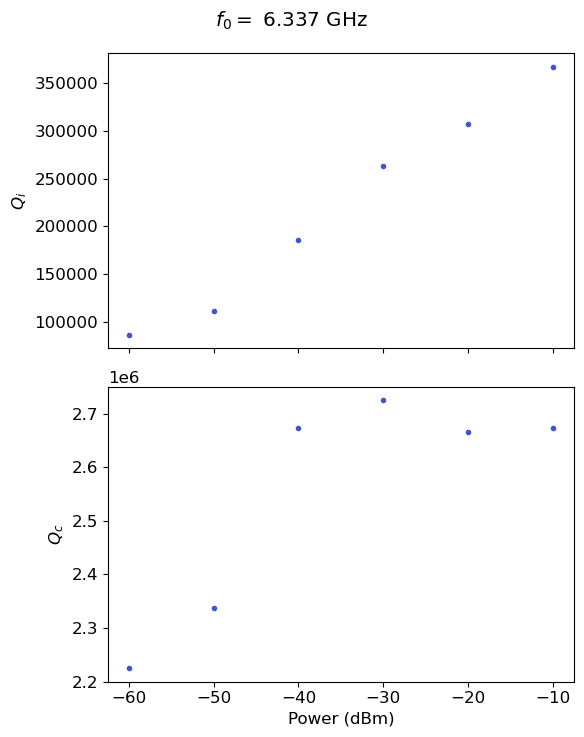

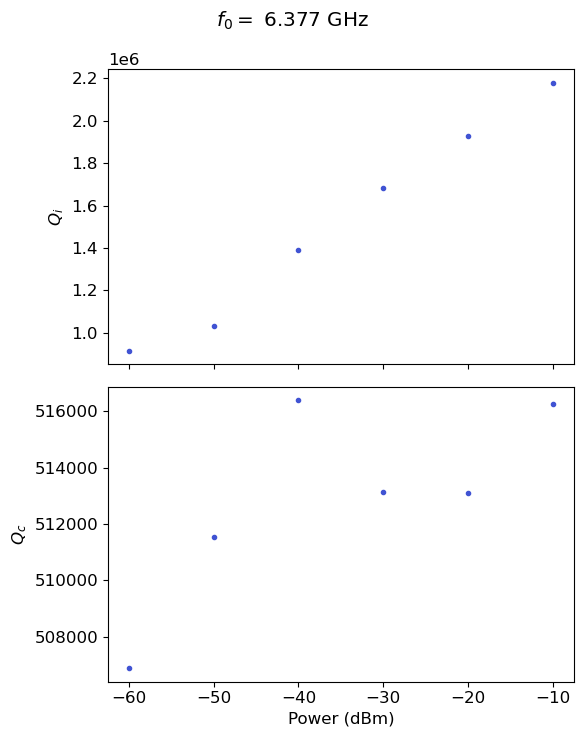

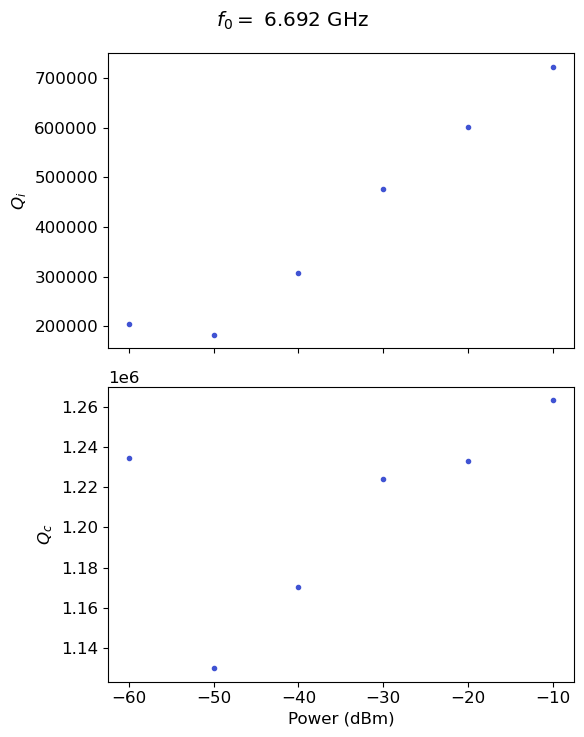

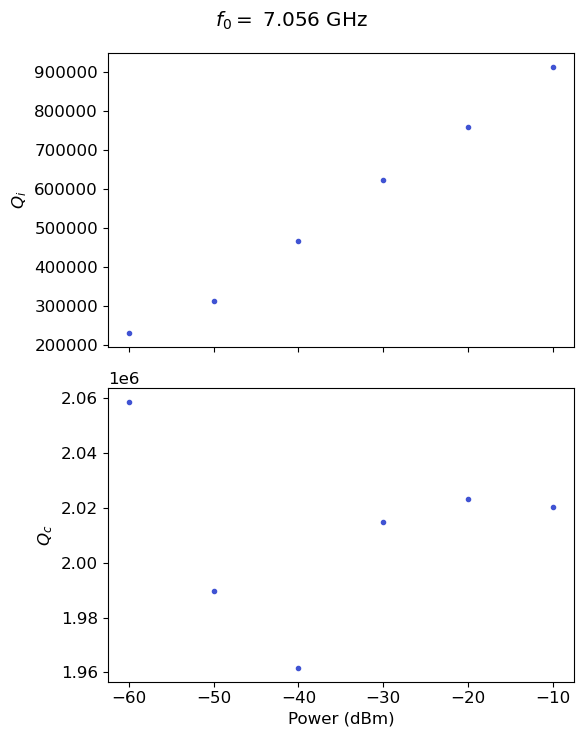

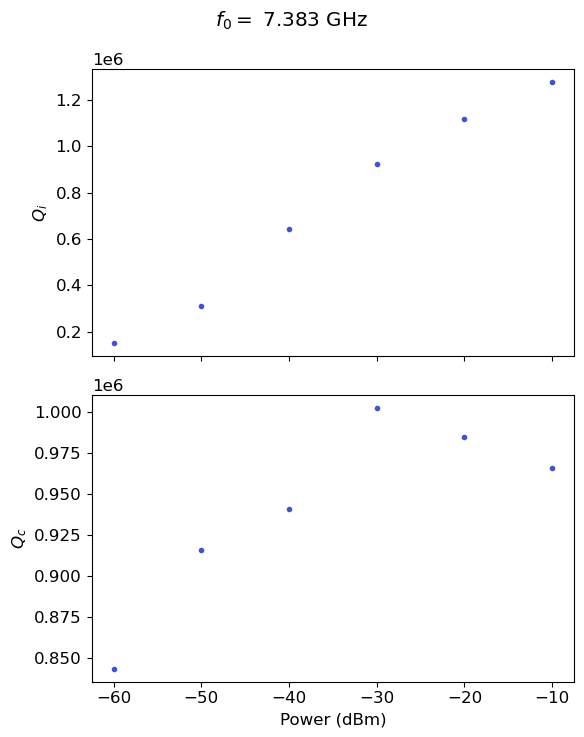

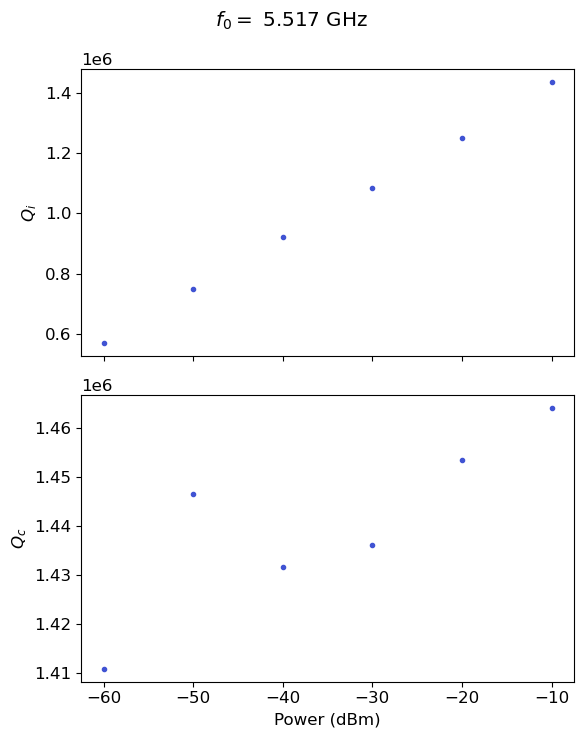

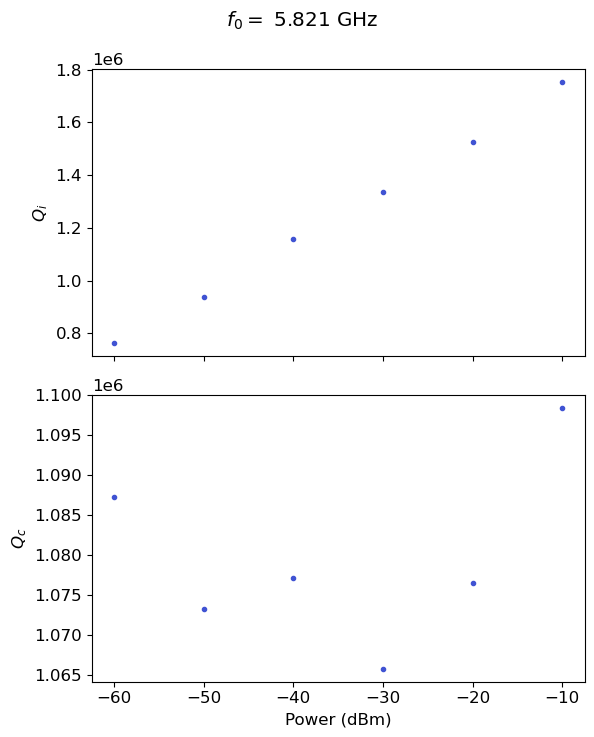

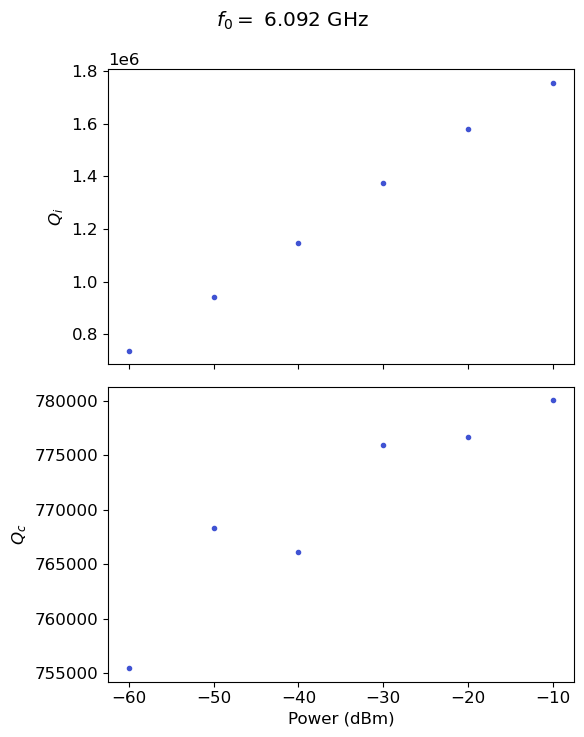

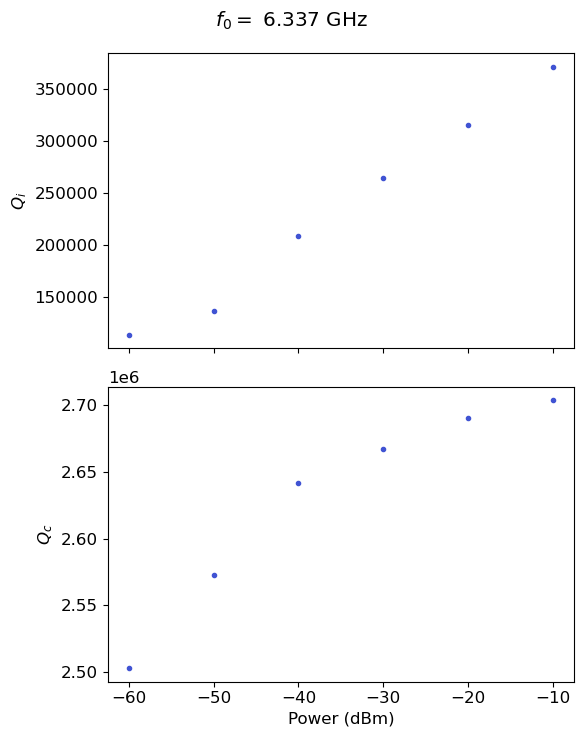

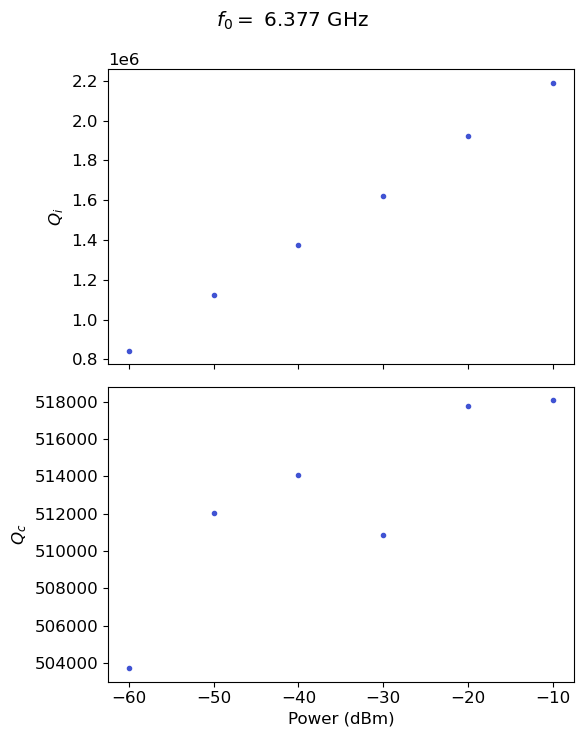

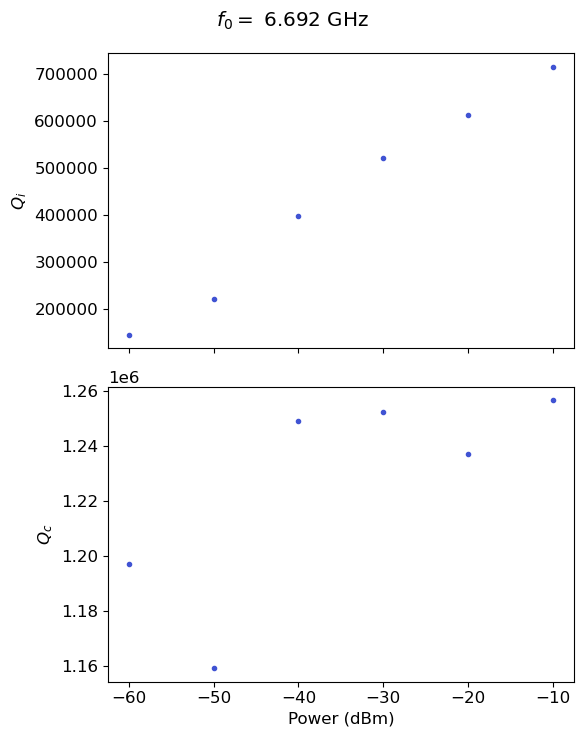

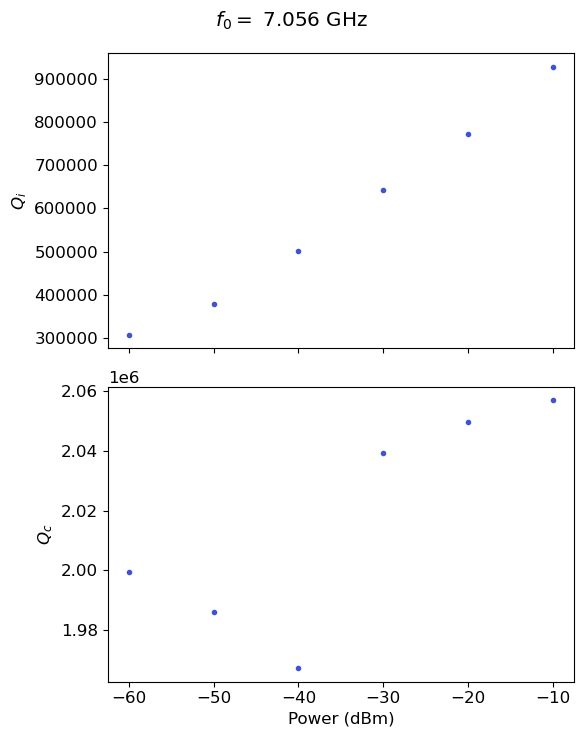

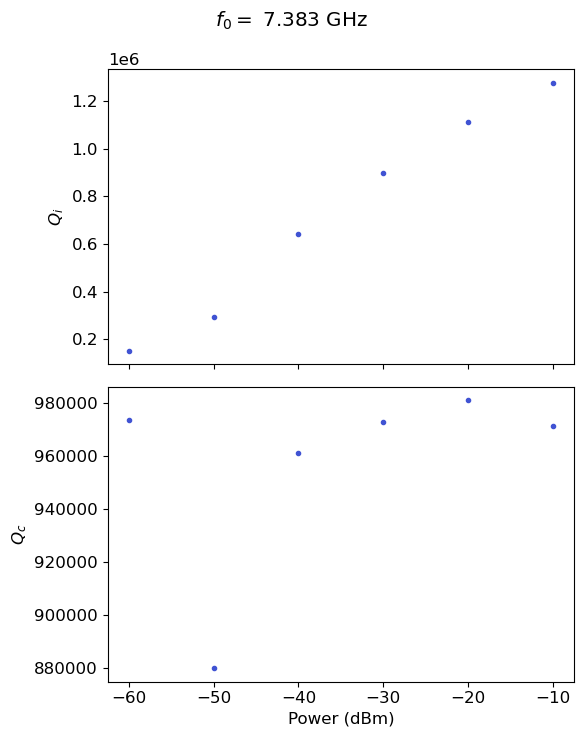

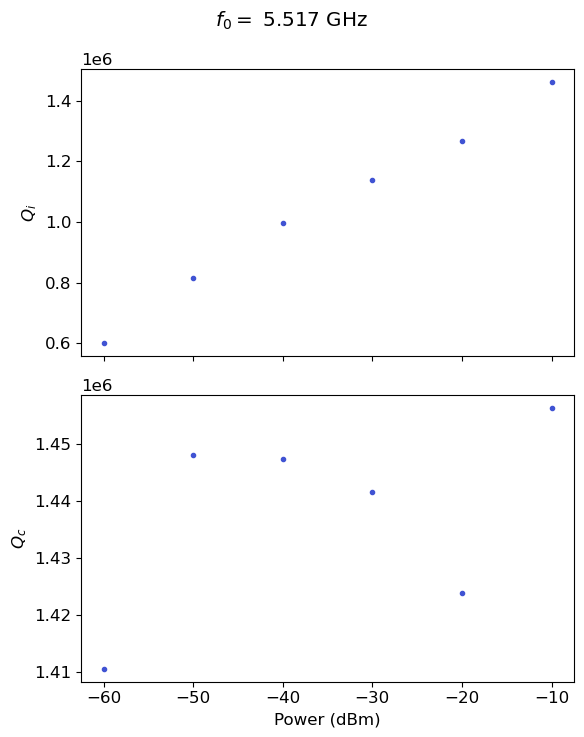

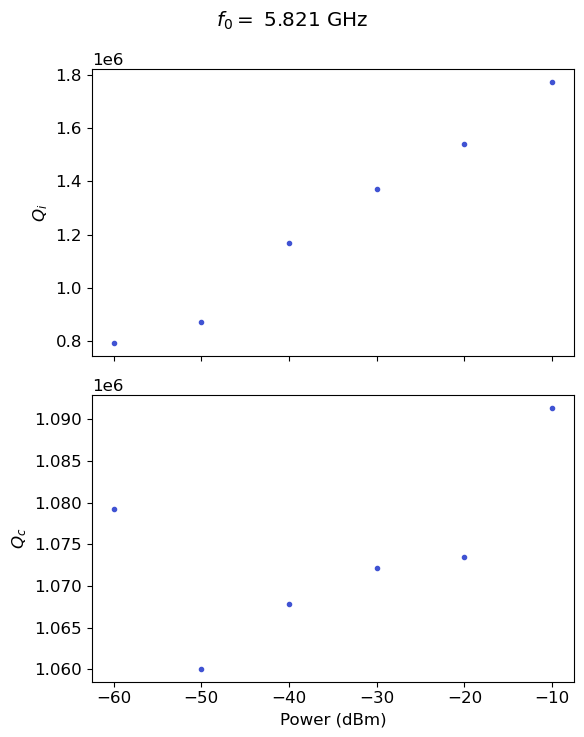

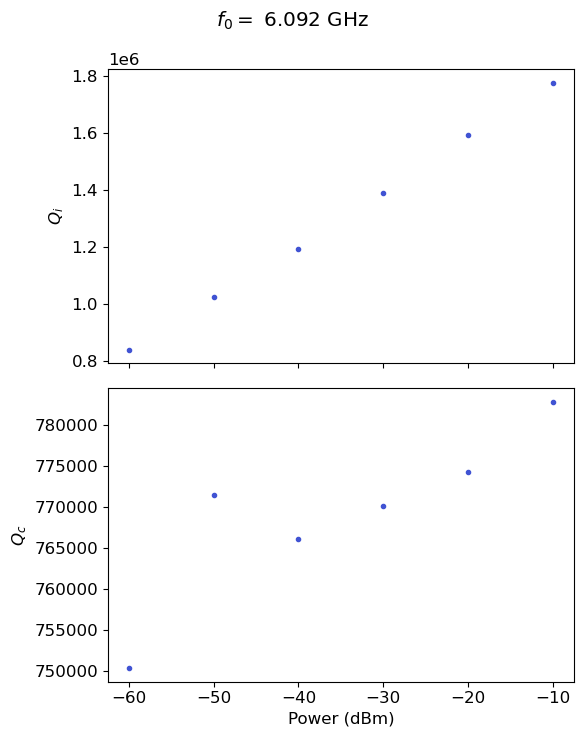

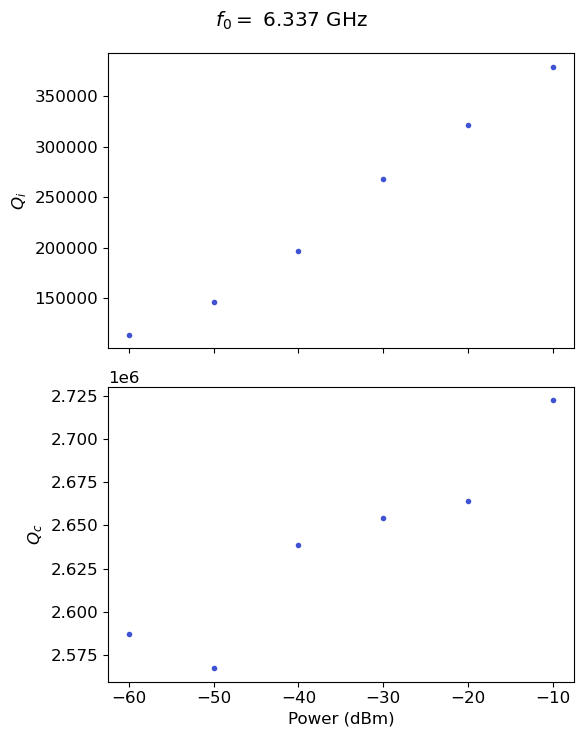

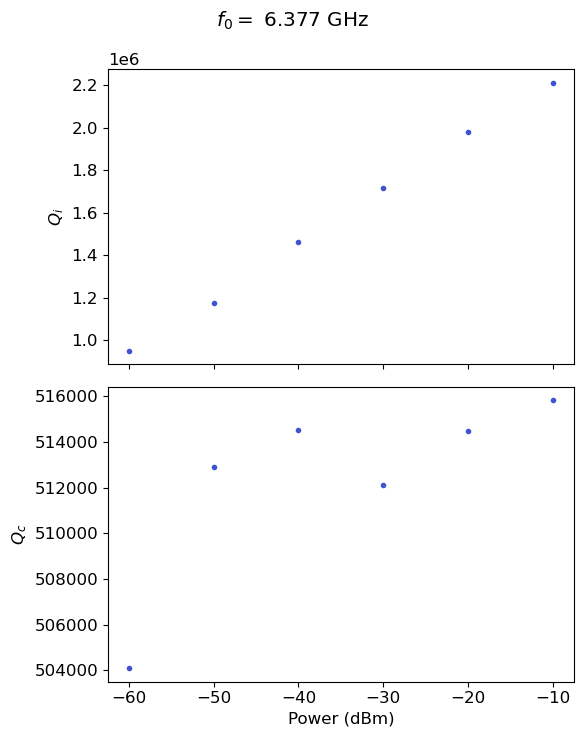

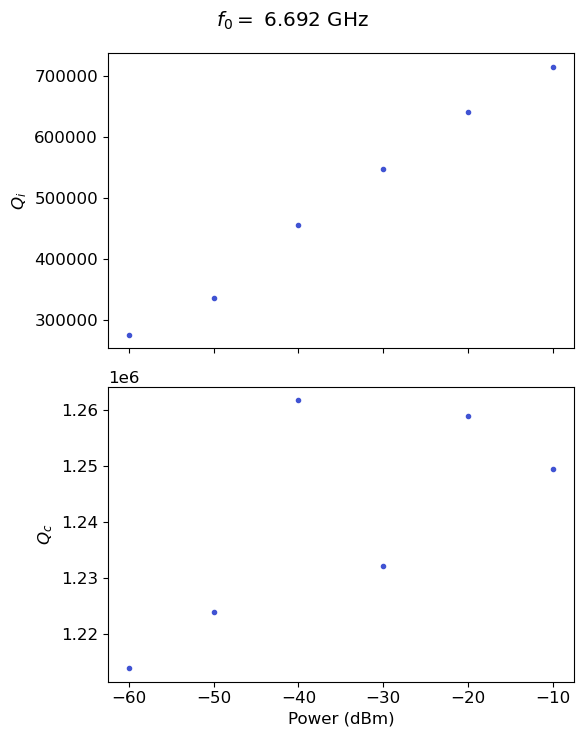

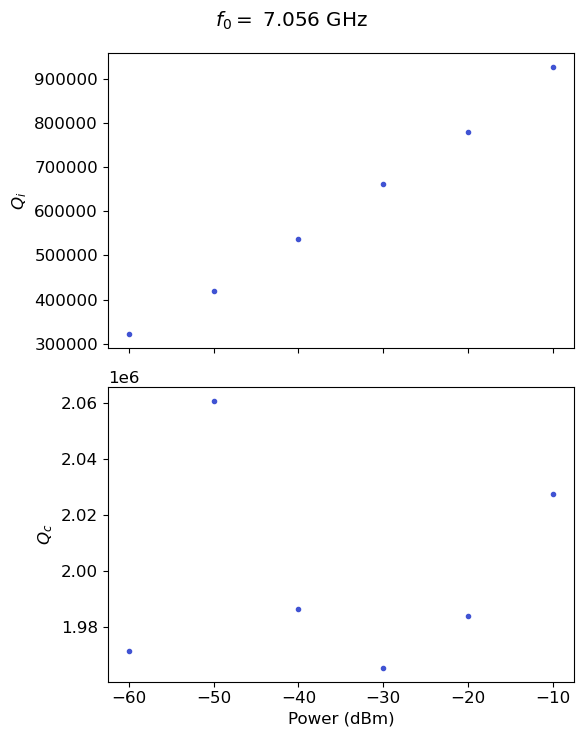

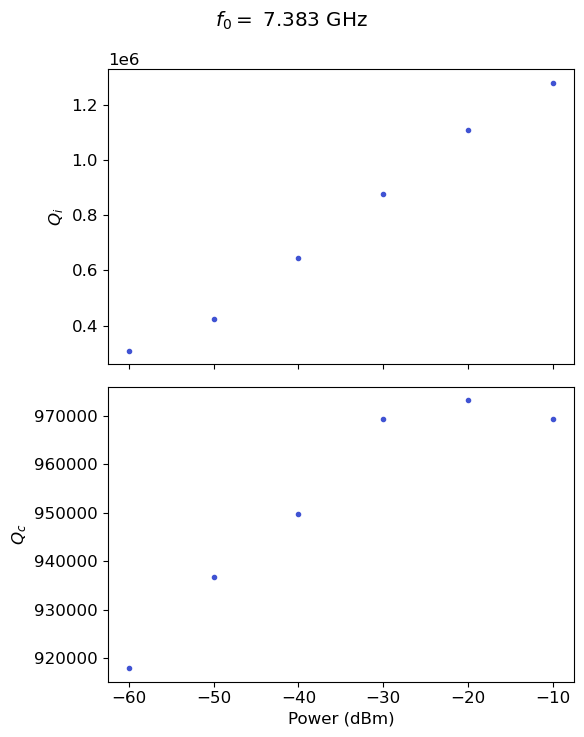

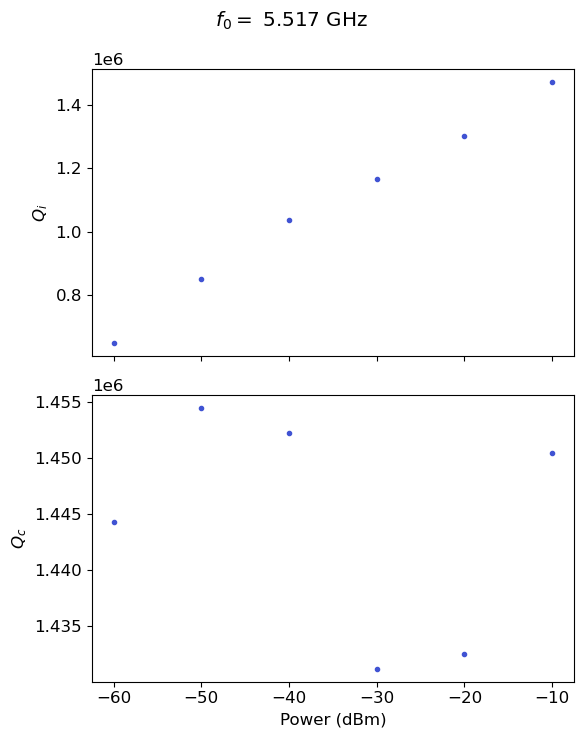

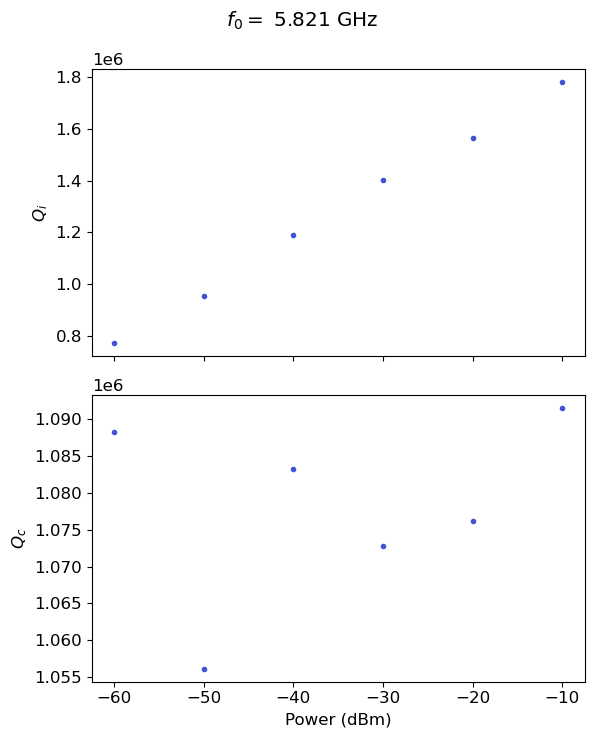

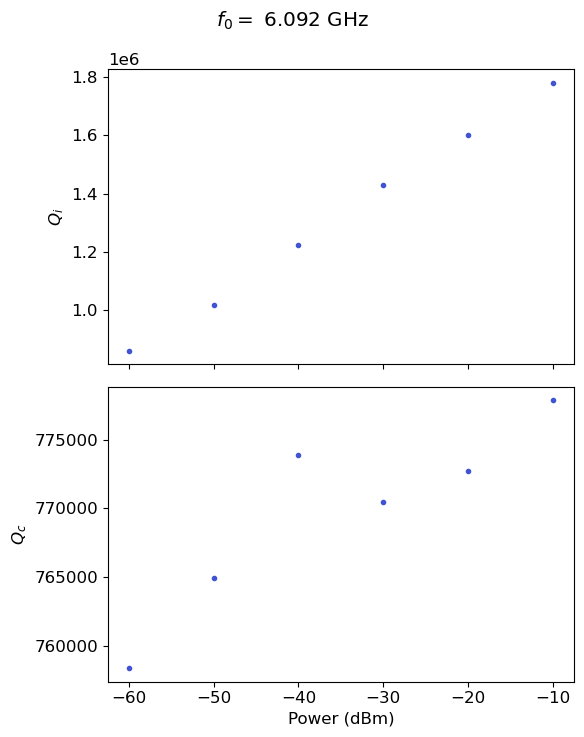

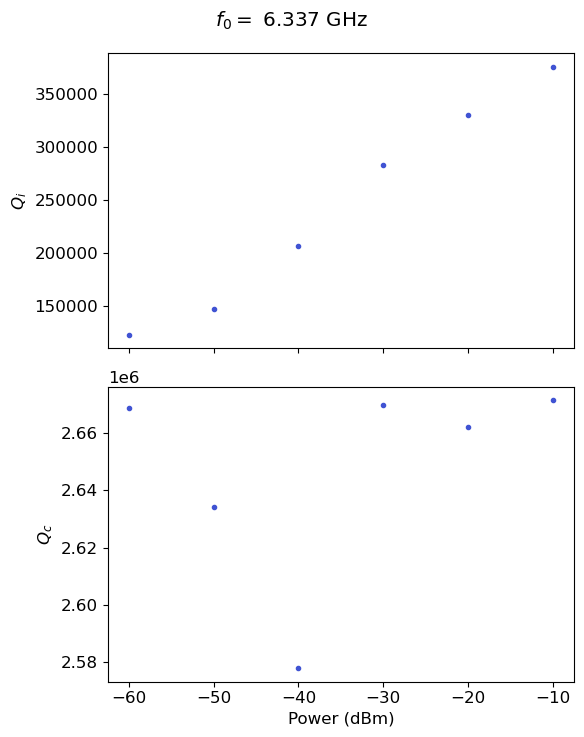

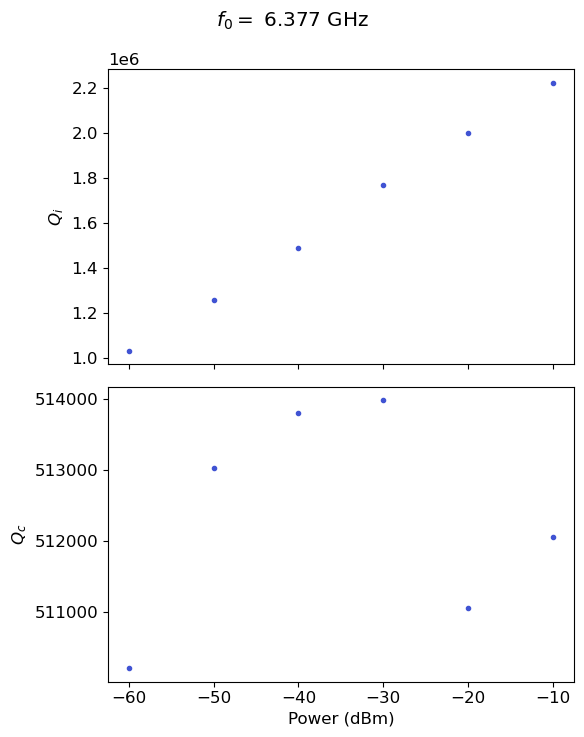

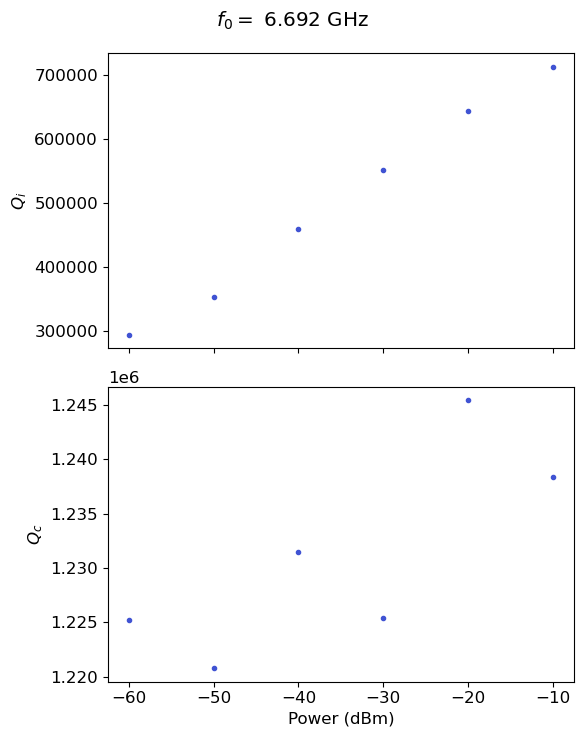

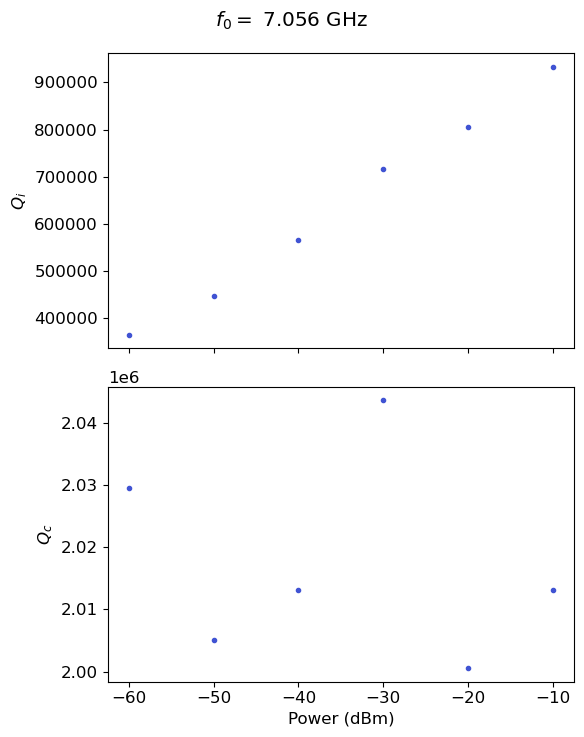

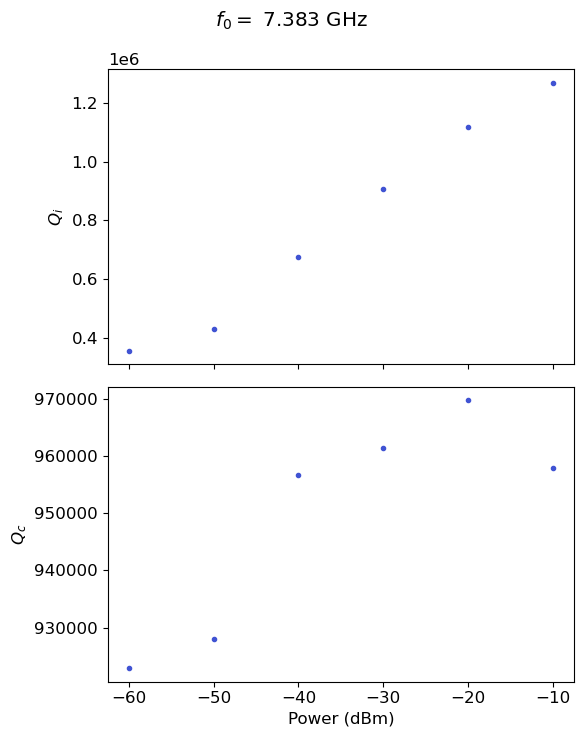

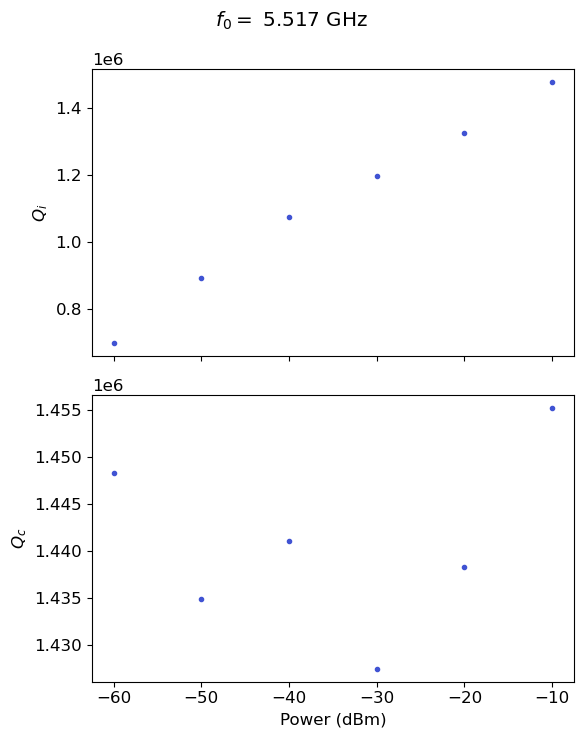

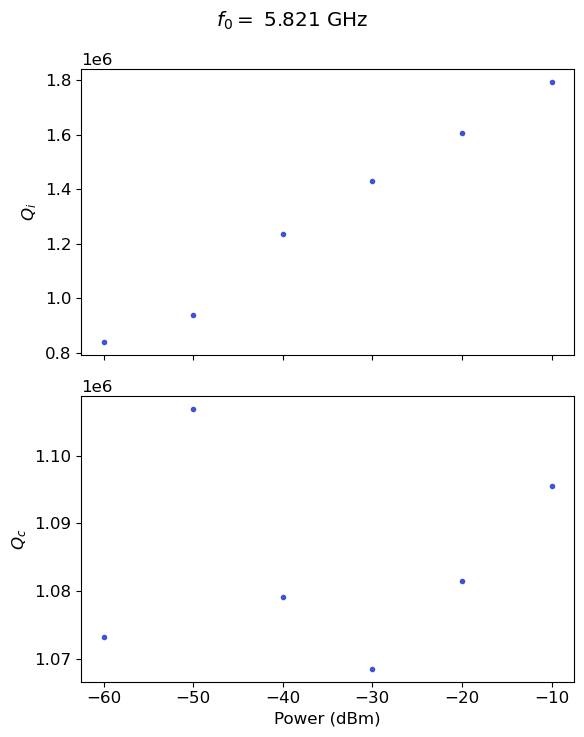

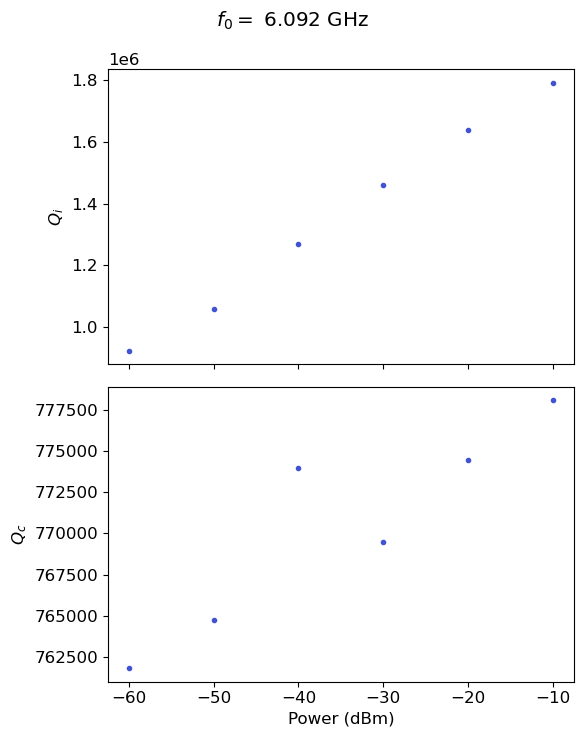

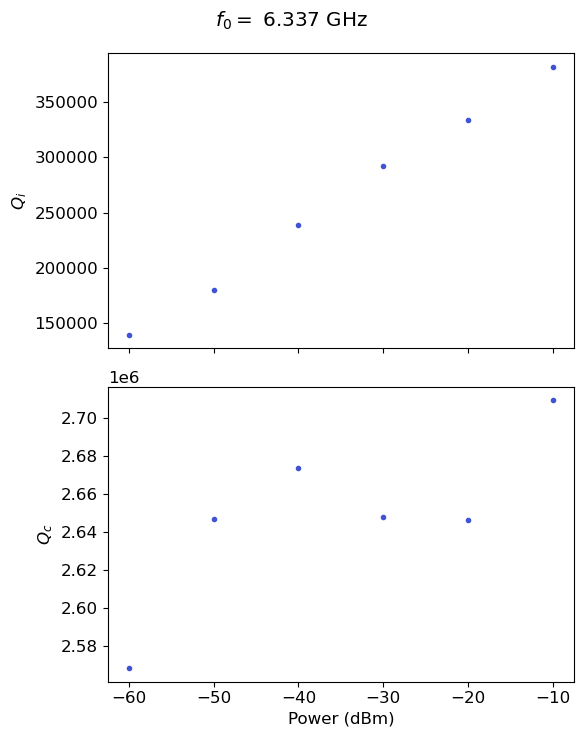

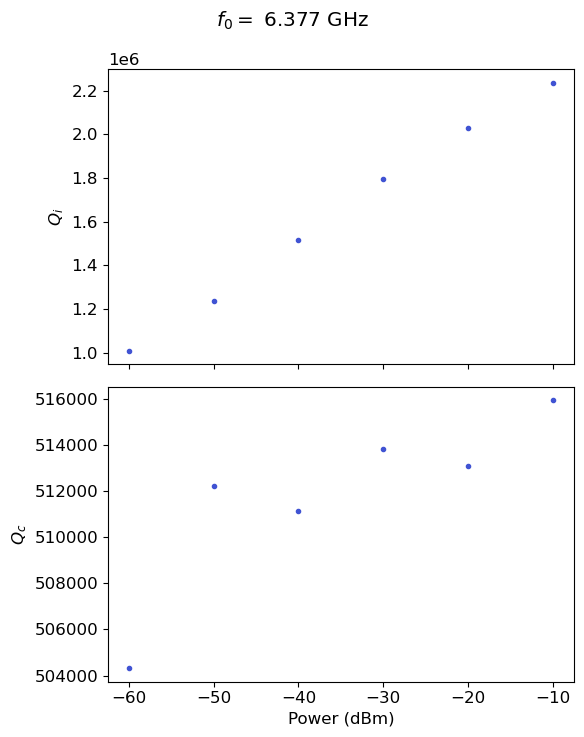

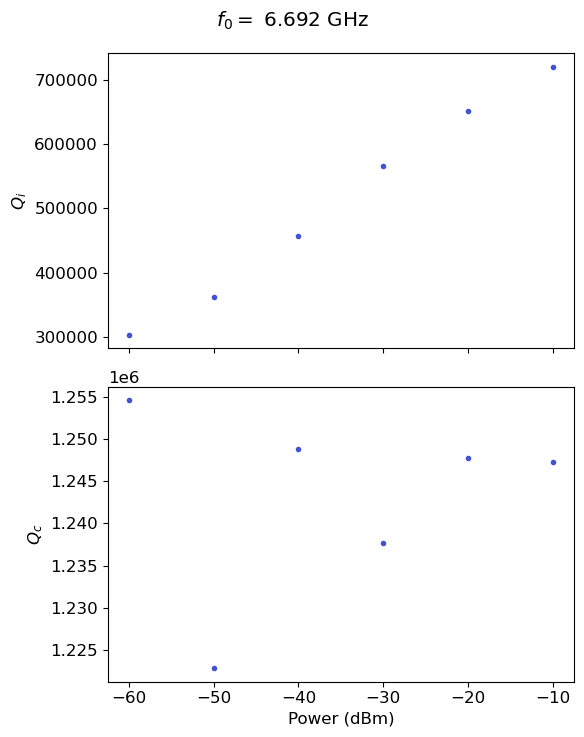

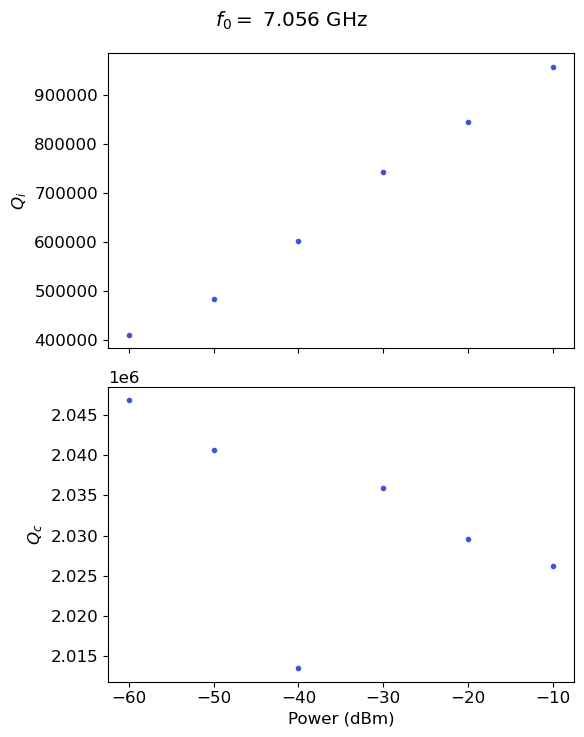

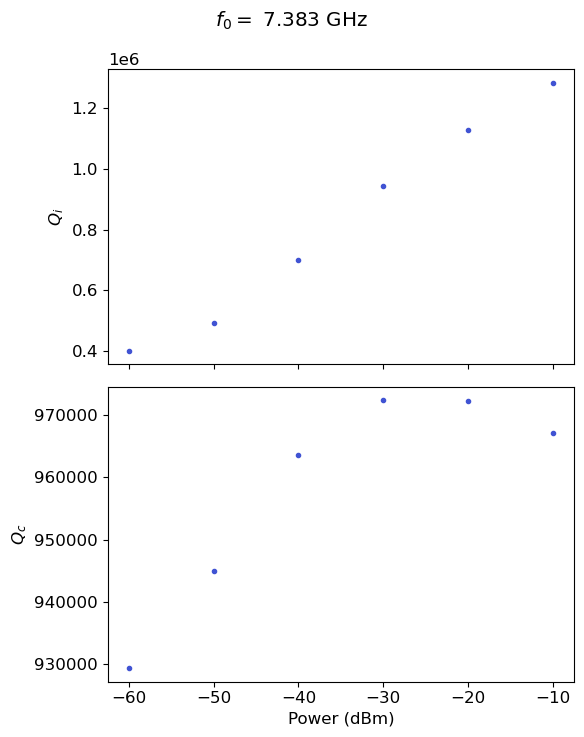

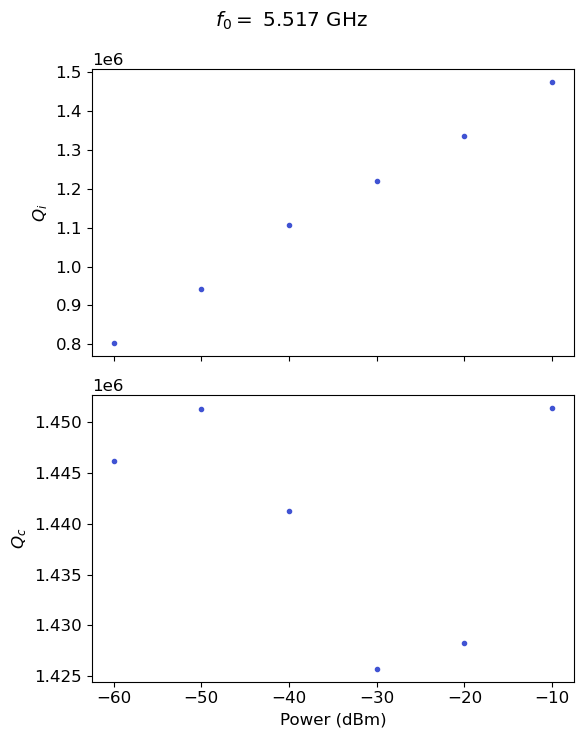

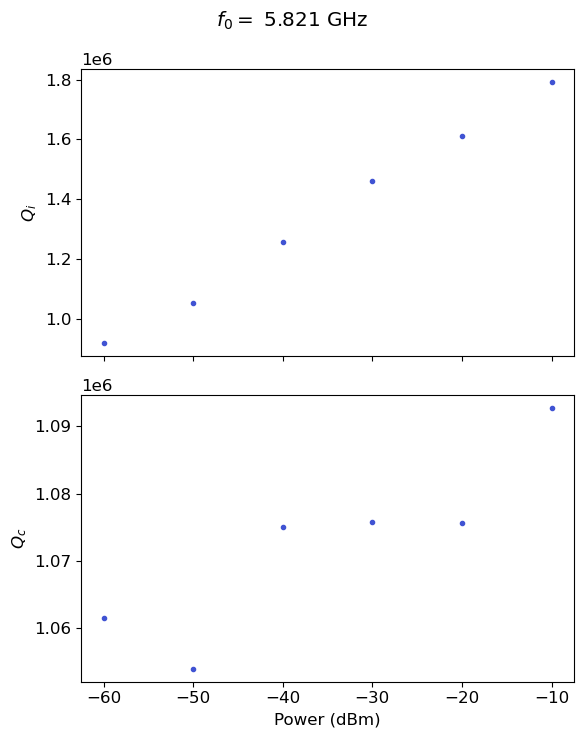

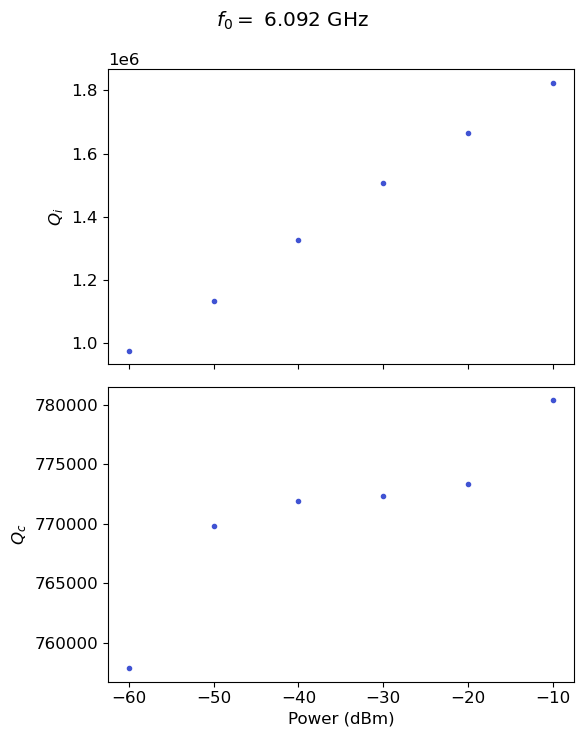

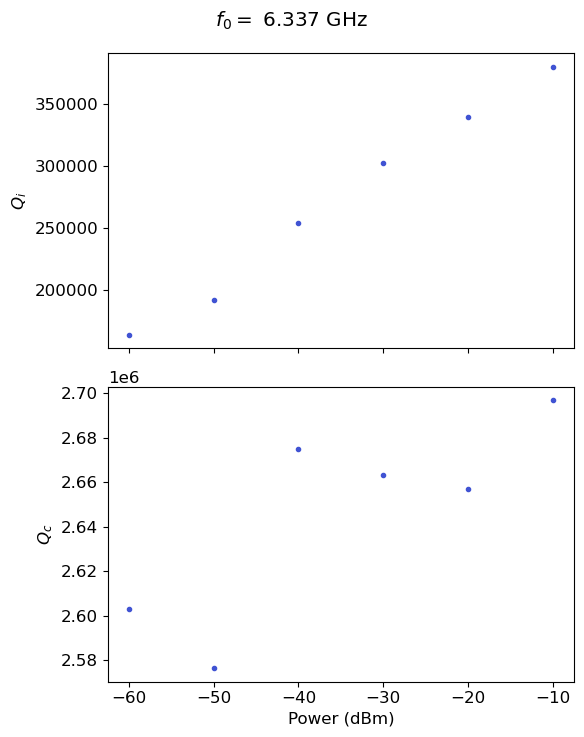

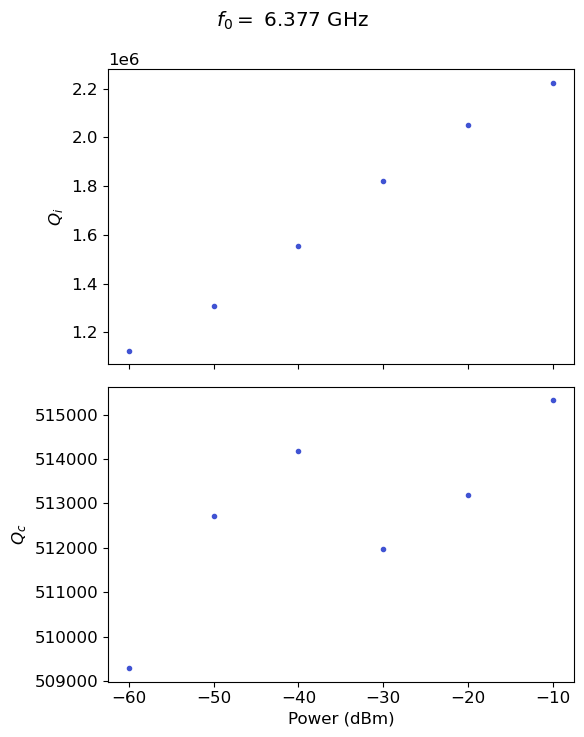

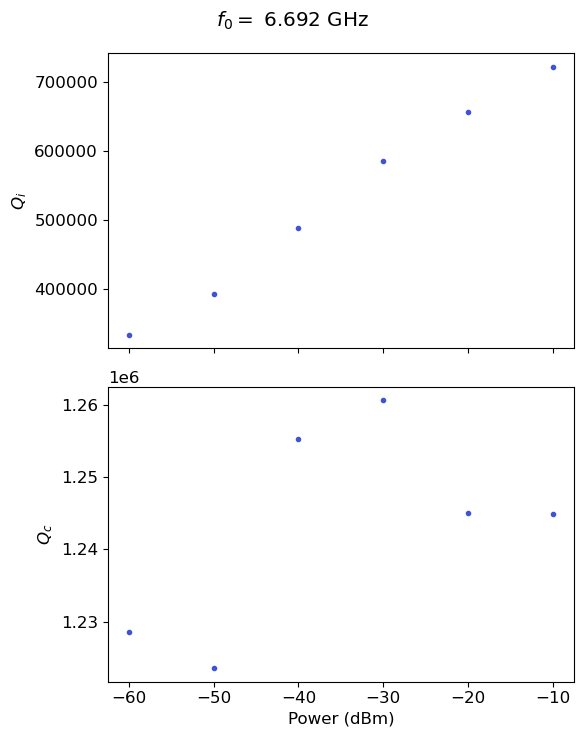

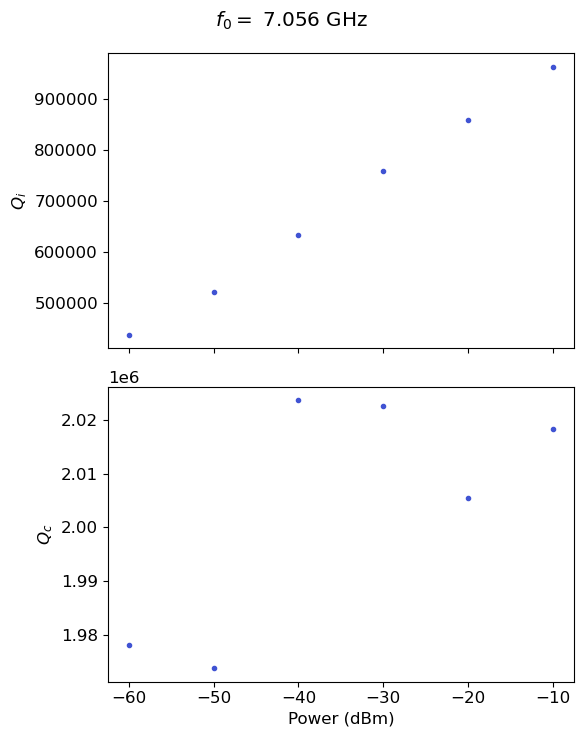

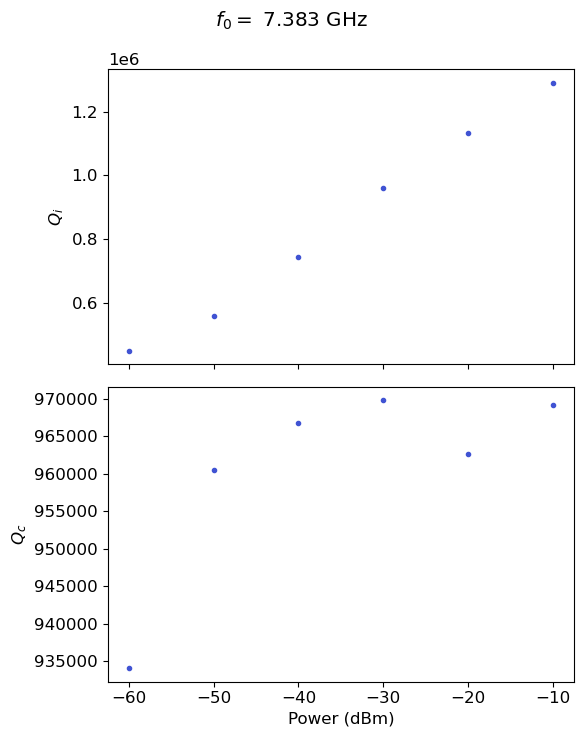

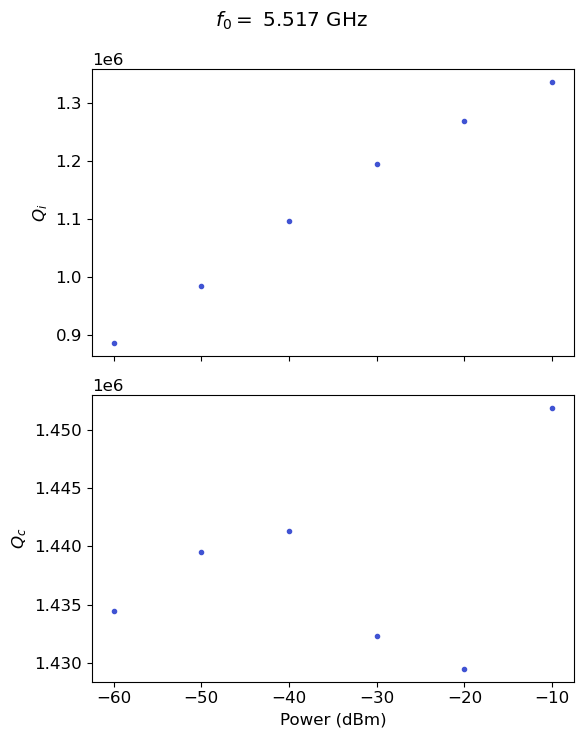

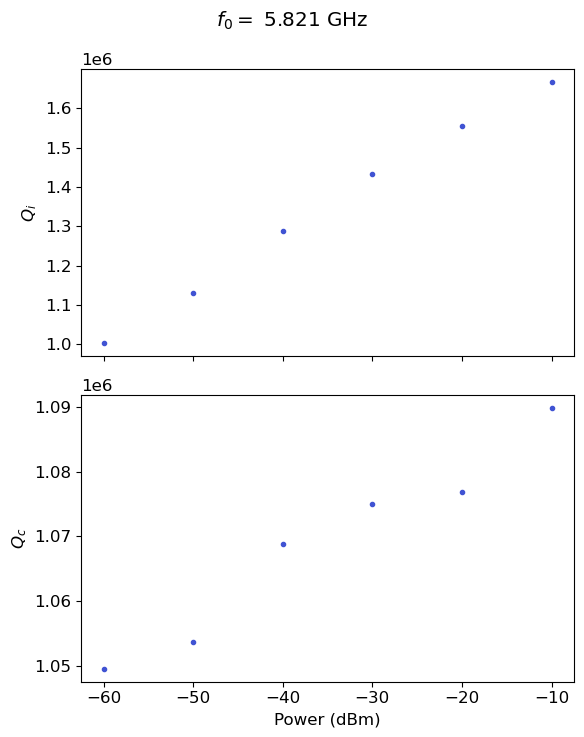

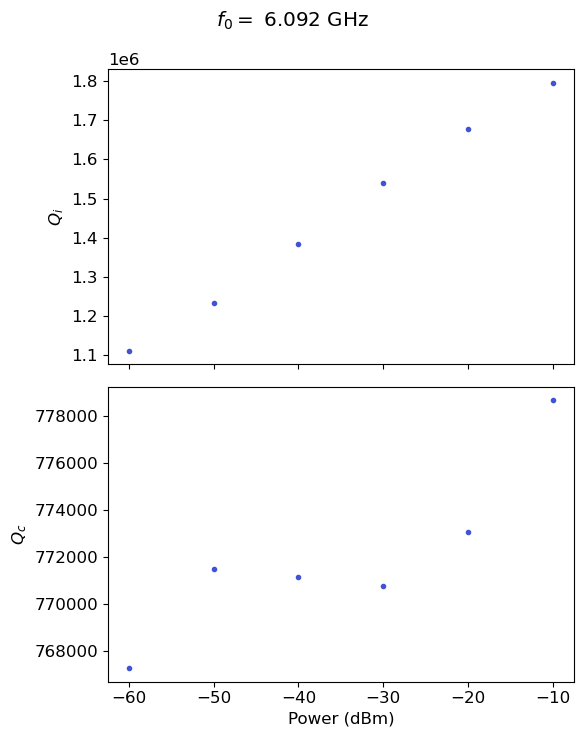

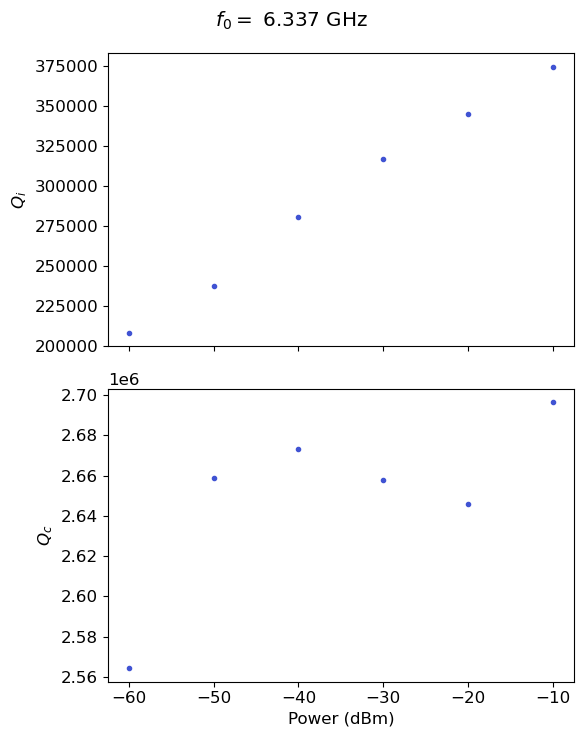

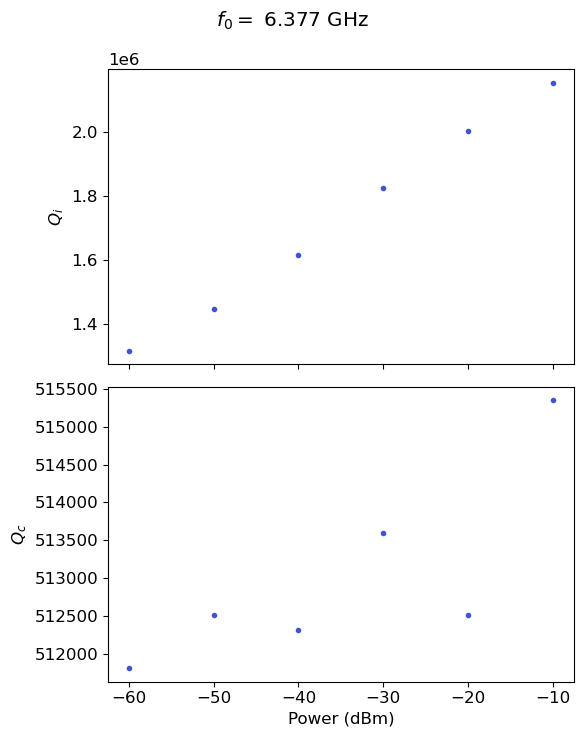

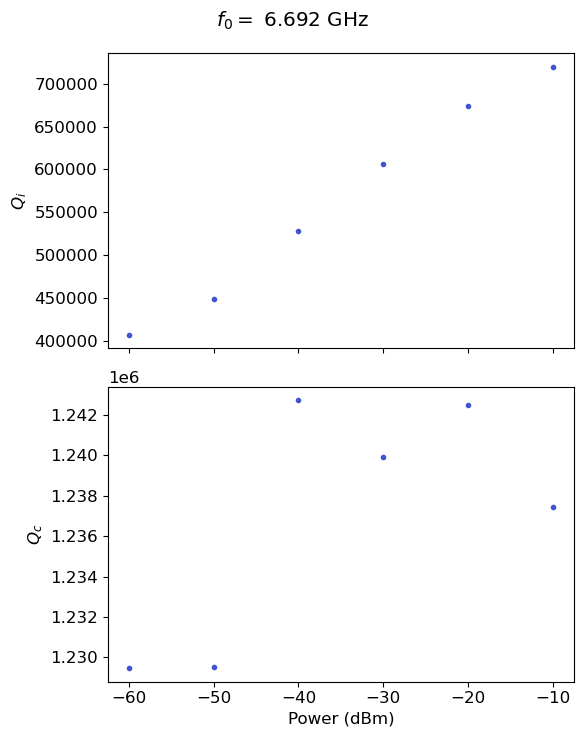

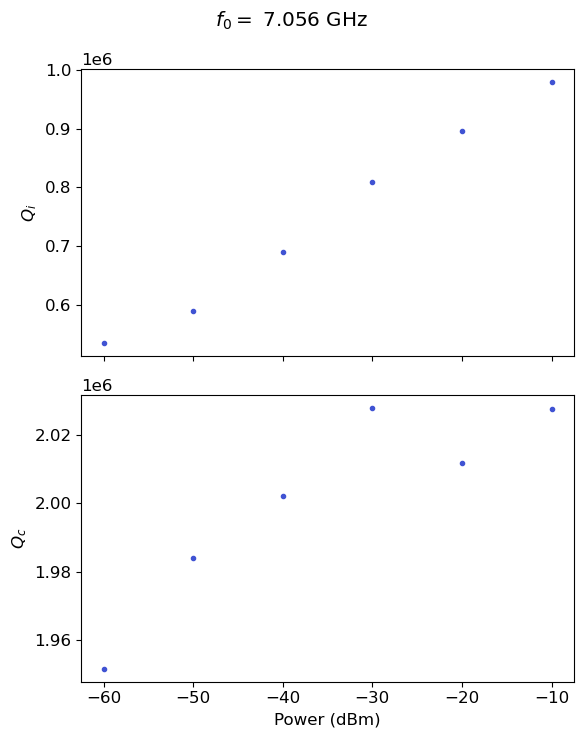

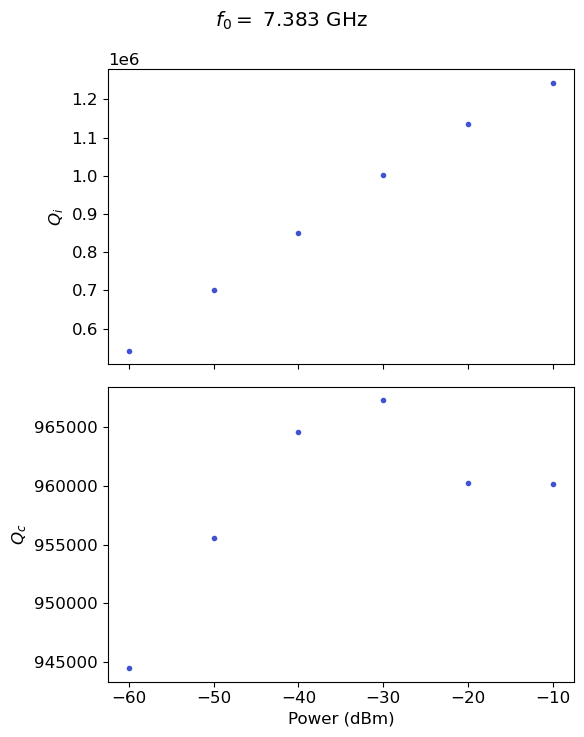

In [113]:
params = sample_dict[sample]
params['temp']=0.04 
res_params = ana_res.analyze_sweep_gen(params['dir'][ind], data_pth, name=meas, img_pth=img_pth, plot=False, nfiles=params['nfiles'][ind], fix_freq=True, type=params['meas_type'][ind], slope=0)

In [114]:
print([r['qi'][0][0] for r in res_params])
print([r['qi'][1][0] for r in res_params])

[478987.1830872795, 694467.1786921177, 749818.5672104165, 109947.78345270263, 101964.81943306695, 209568.71139287562, 295742.11567601265, 361810.74575761904]
[503502.8088521426, 688066.0565409159, 729003.5020228988, 86795.76330338325, 915740.7205453354, 204420.65349187833, 230207.2853421497, 150154.03052631763]


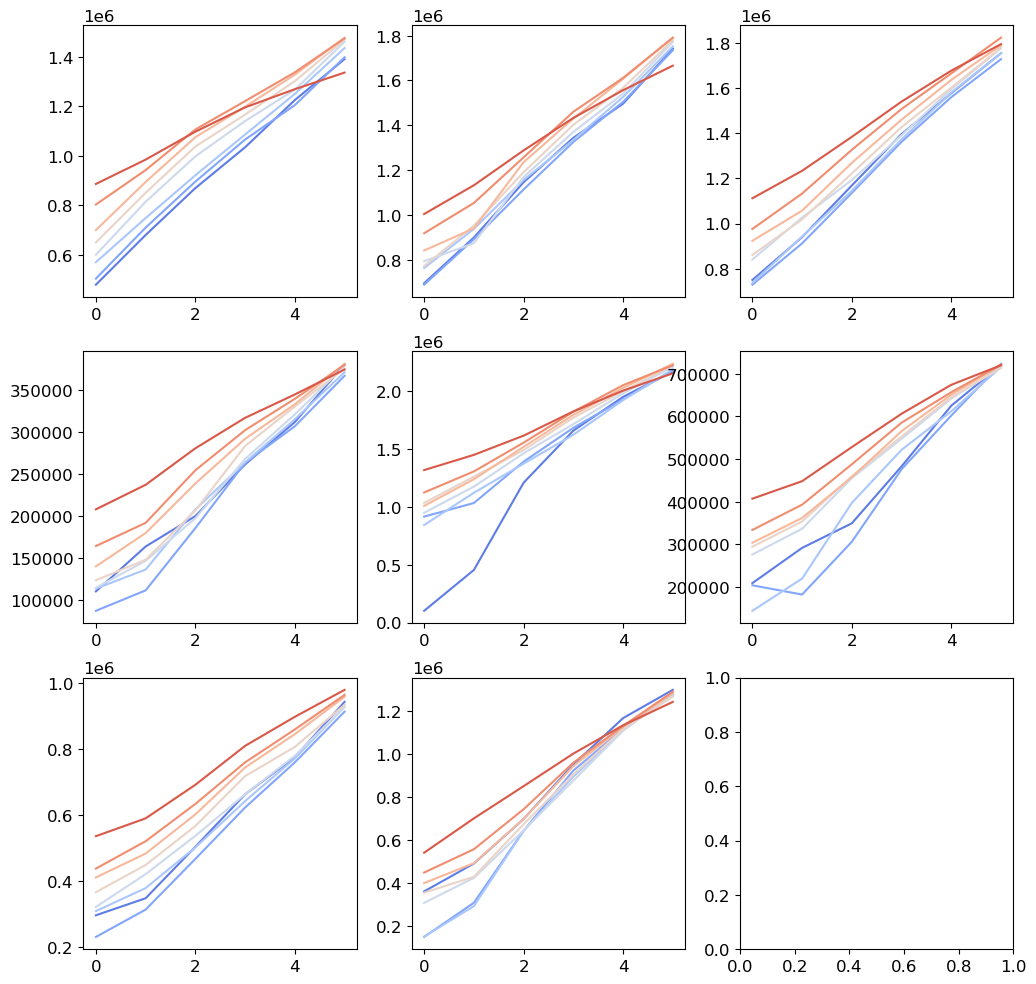

In [116]:
sns.set_palette('coolwarm',8)
fig, ax = plt.subplots(3,3, figsize=(12,12))
ax = ax.flatten()
for i, r in enumerate(res_params):
    for q in r['qi']: 
        ax[i].plot(q)

Counter({6336548: 6, 6692444: 6, 5516761: 6, 7056424: 6, 5820847: 6, 6091772: 6, 6376981: 6, 7382930: 6})
Counter({6336548: 6, 6692444: 6, 5516761: 6, 7056424: 6, 5820847: 6, 6091772: 6, 6376981: 6, 7382930: 6})
['res_5516761_60dbm_wide1', 'res_5516761_50dbm_wide1', 'res_5516761_40dbm_wide1', 'res_5516761_30dbm_wide1', 'res_5516761_20dbm_wide1', 'res_5516761_10dbm_wide1']
['res_5820847_60dbm_wide1', 'res_5820847_50dbm_wide1', 'res_5820847_40dbm_wide1', 'res_5820847_30dbm_wide1', 'res_5820847_20dbm_wide1', 'res_5820847_10dbm_wide1']
['res_6091772_60dbm_wide1', 'res_6091772_50dbm_wide1', 'res_6091772_40dbm_wide1', 'res_6091772_30dbm_wide1', 'res_6091772_20dbm_wide1', 'res_6091772_10dbm_wide1']


['res_6336548_60dbm_wide1', 'res_6336548_50dbm_wide1', 'res_6336548_40dbm_wide1', 'res_6336548_30dbm_wide1', 'res_6336548_20dbm_wide1', 'res_6336548_10dbm_wide1']
['res_6376981_60dbm_wide1', 'res_6376981_50dbm_wide1', 'res_6376981_40dbm_wide1', 'res_6376981_30dbm_wide1', 'res_6376981_20dbm_wide1', 'res_6376981_10dbm_wide1']
['res_6692444_60dbm_wide1', 'res_6692444_50dbm_wide1', 'res_6692444_40dbm_wide1', 'res_6692444_30dbm_wide1', 'res_6692444_20dbm_wide1', 'res_6692444_10dbm_wide1']
['res_7056424_60dbm_wide1', 'res_7056424_50dbm_wide1', 'res_7056424_40dbm_wide1', 'res_7056424_30dbm_wide1', 'res_7056424_20dbm_wide1', 'res_7056424_10dbm_wide1']


['res_7382930_60dbm_wide1', 'res_7382930_50dbm_wide1', 'res_7382930_40dbm_wide1', 'res_7382930_30dbm_wide1', 'res_7382930_20dbm_wide1', 'res_7382930_10dbm_wide1']


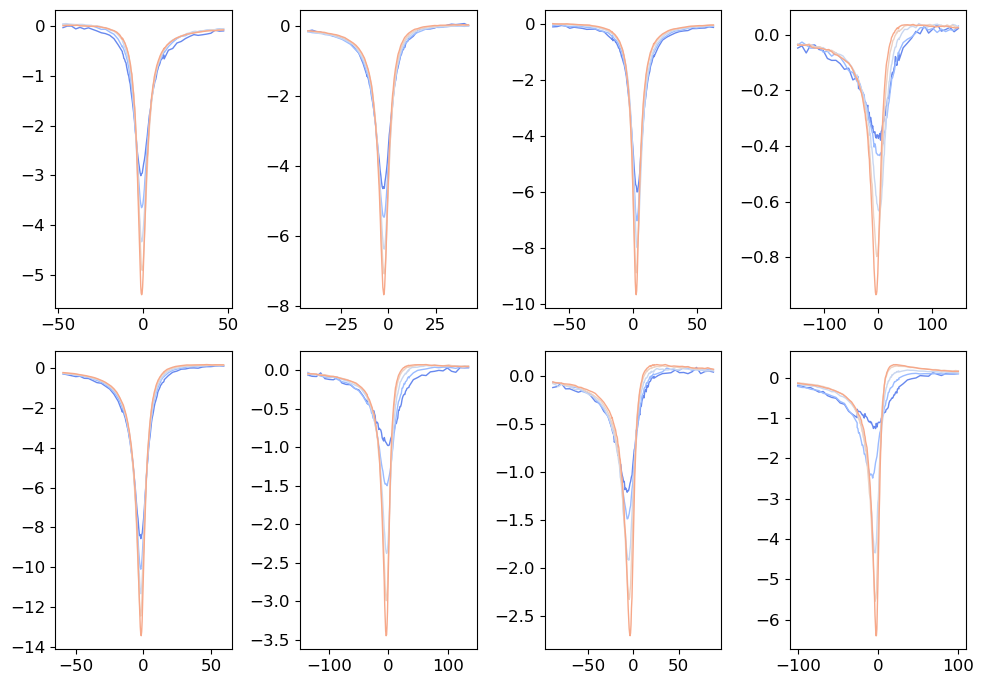

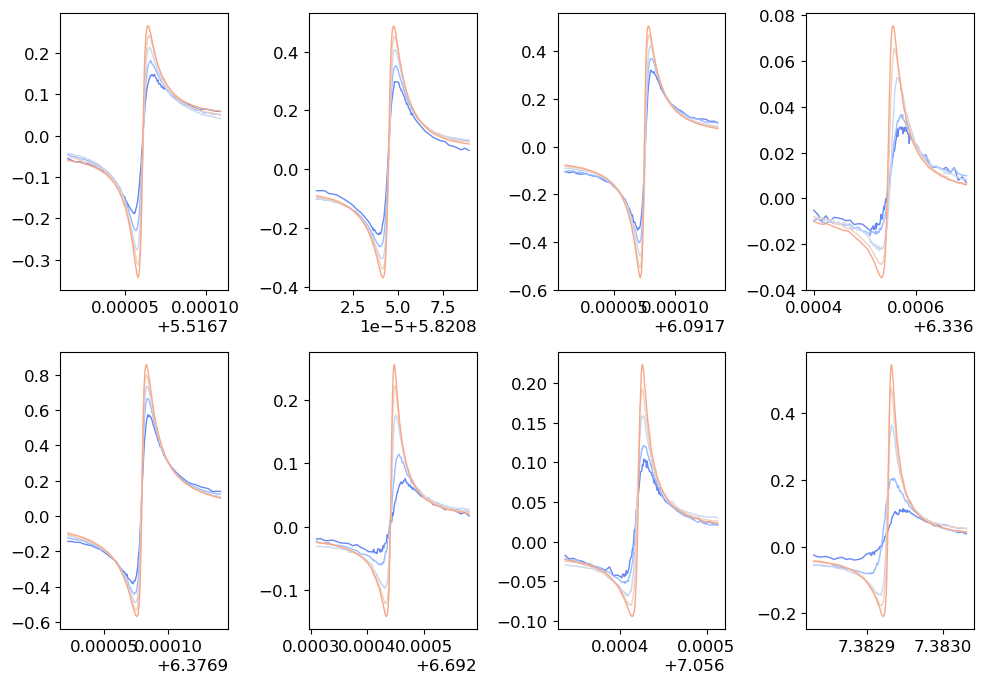

In [29]:
import cProfile

#slope = 0
#%matplotlib widget

ana_res.plot_all(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, norm=True, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind])#, slope=slope)

#### Reorder the data based on pitch (only run once)

In [30]:

if params['meas_type']=='soc':
    res_params = ana_res.convert_power(res_params) 

params, res_params=ana_res.reorder(params, res_params) # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

### Power sweep and TLS fits

Error in plotting
Failed!
Failed!
Failed!


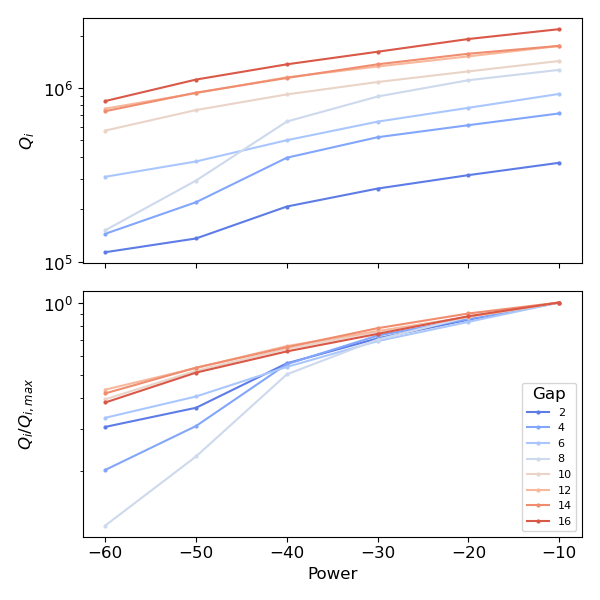

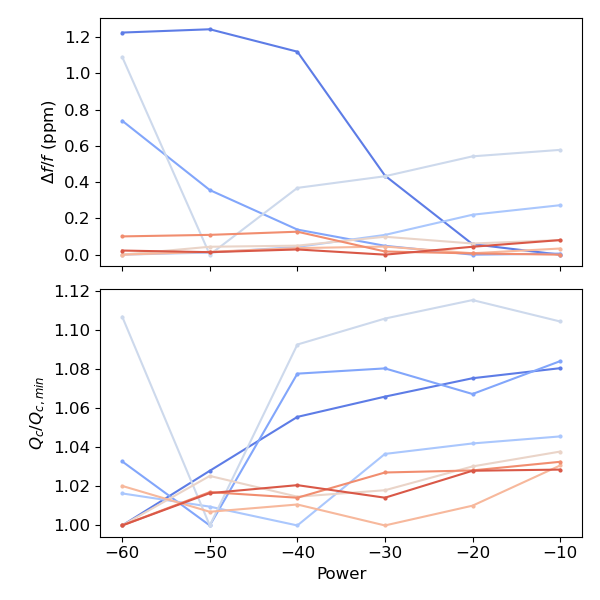

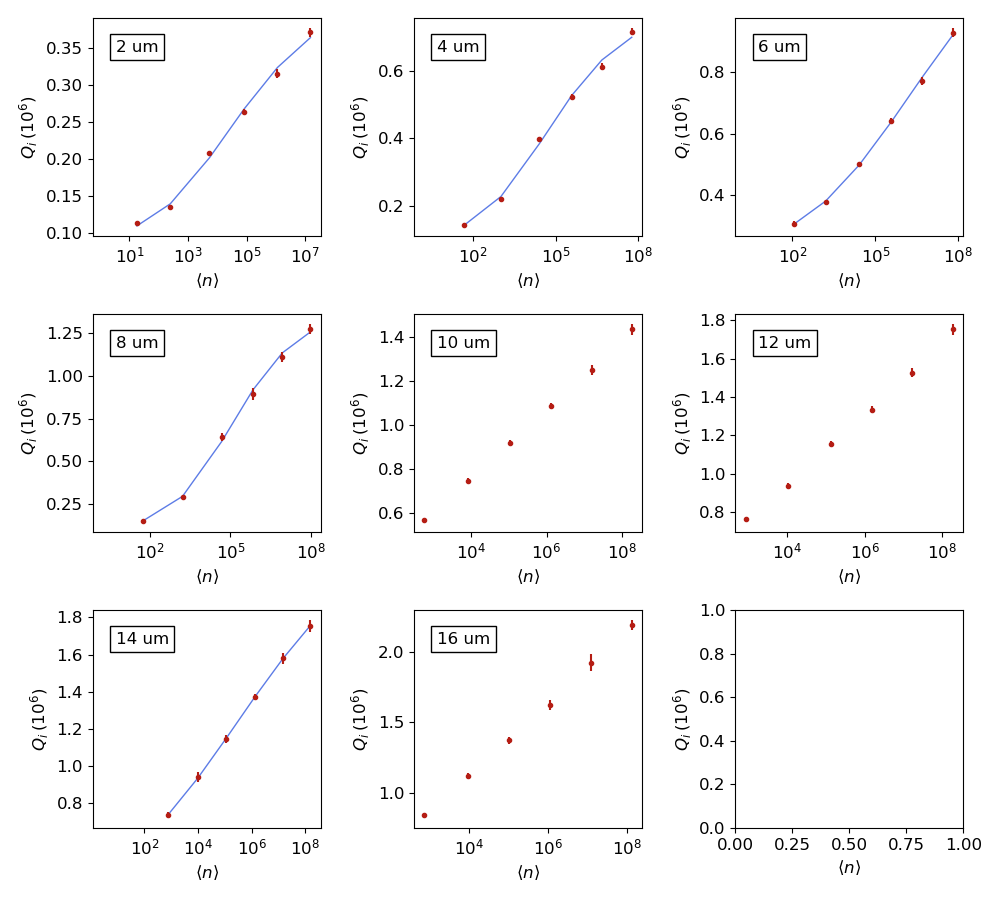

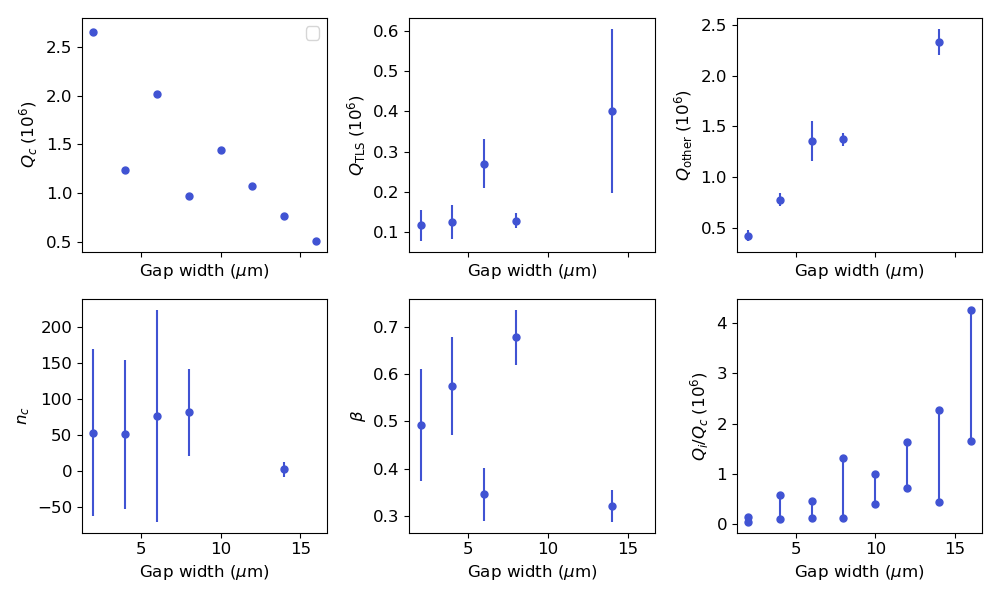

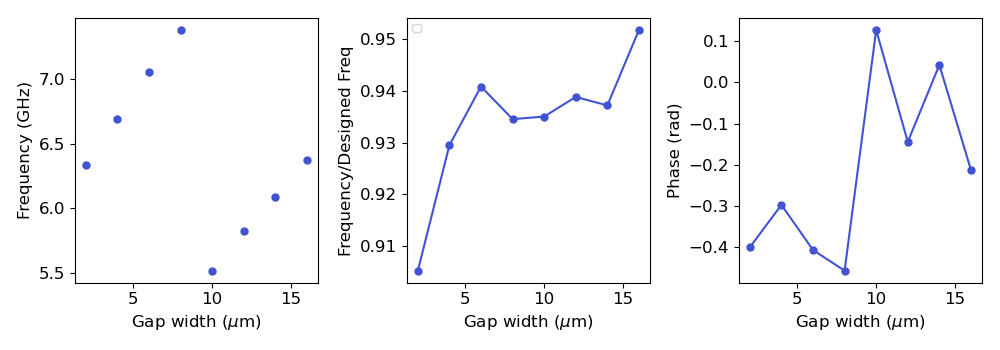

In [31]:
%matplotlib widget
ana_res.plot_power(res_params, params, img_pth, use_pitch=True)
cfg = ana_tls.fit_qi(res_params, params, img_pth) 
ana_tls.plot_res_pars([params], [''],img_pth)
ana_res.plot_res_pars([params], [''], img_pth)
hy.save_np(params, img_pth+'Text/' + params['meas'][ind] + '.yml')


### Plot with different max and min power for each resonator 

Failed!


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


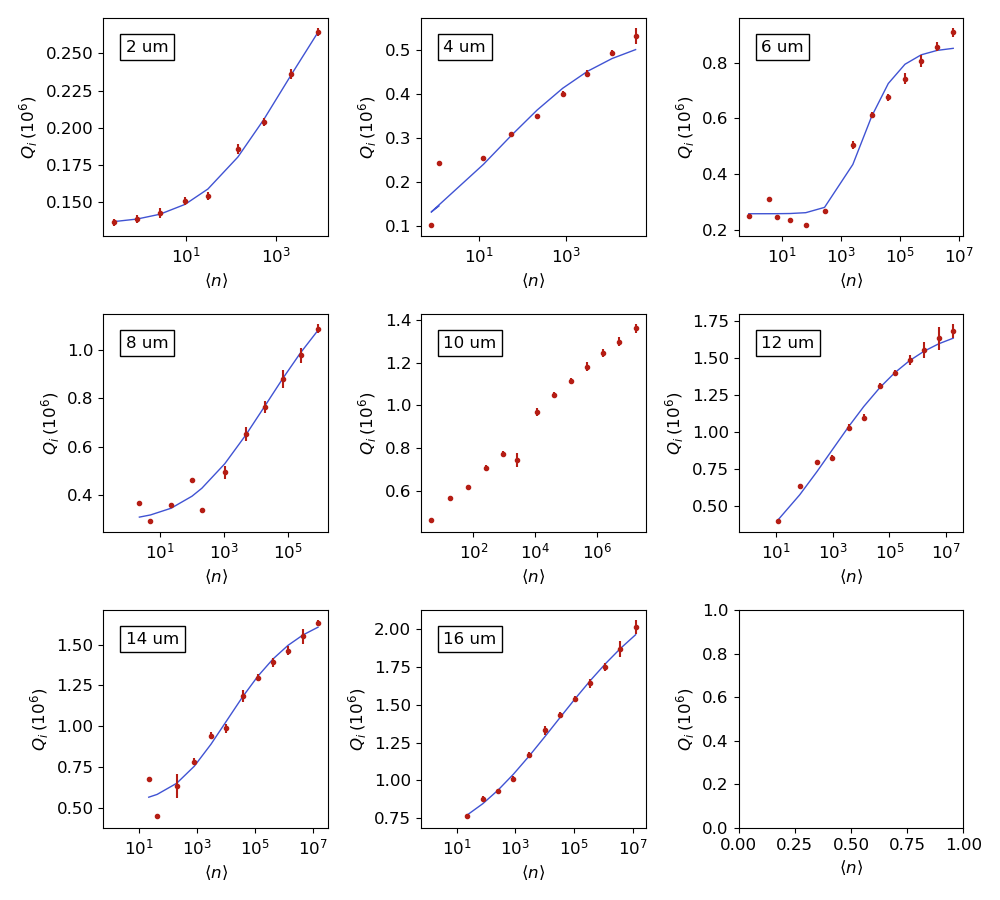

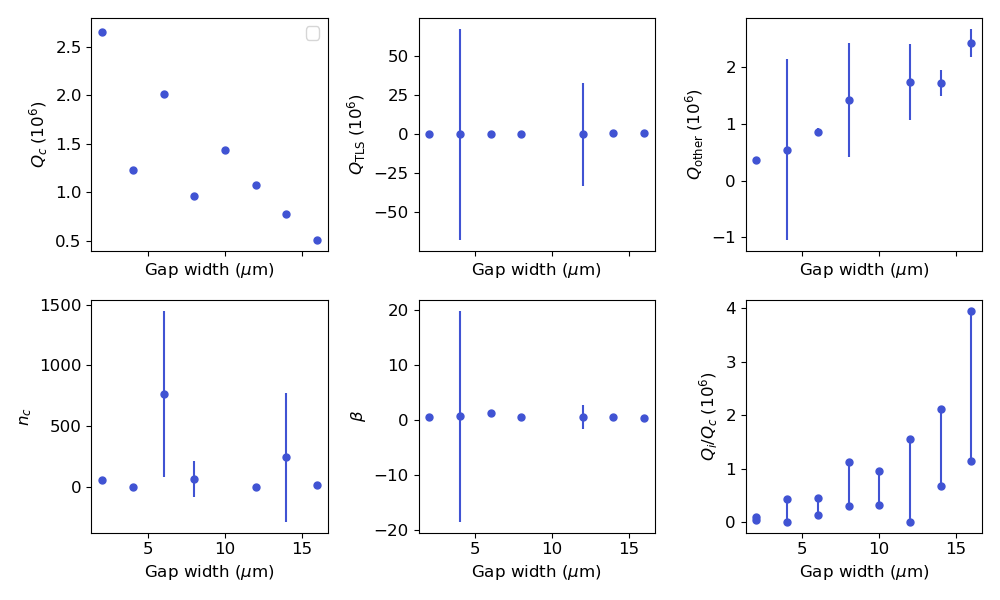

In [70]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)

### Print out info for running scans

In [9]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(lw)
print(freq)

linewidth
[62108.84999872619, 31754.88651060028, 35928.47570952304, 29346.31301041099, 14571.561073889929, 14732.344817108129, 17533.865679245962, 19348.403941294877]
[6336553046.740015, 6692450581.395647, 7056426236.336695, 7382931608.965666, 5516761886.202525, 5820846804.326765, 6091775267.869023, 6376982672.309232]


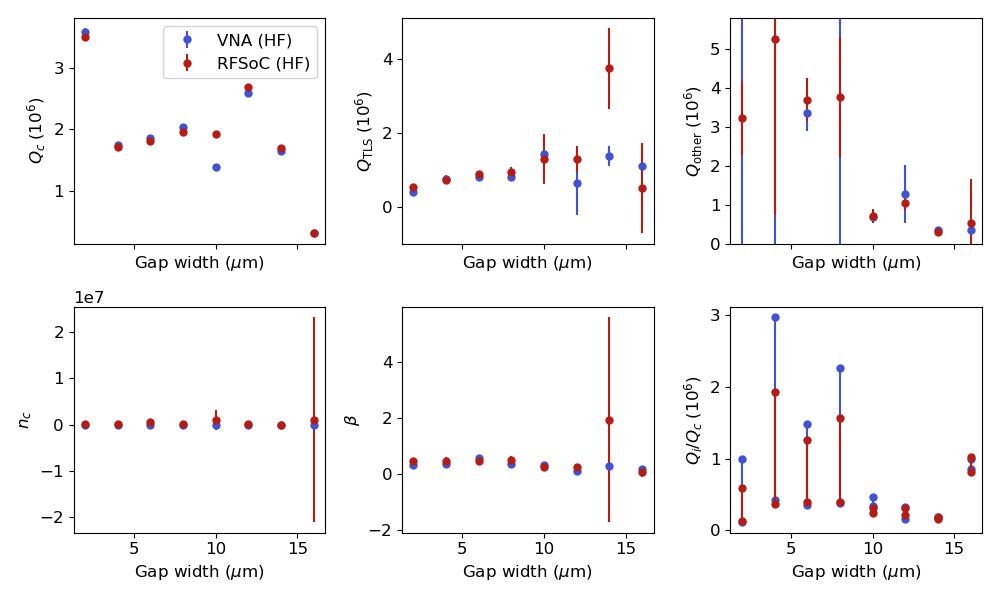

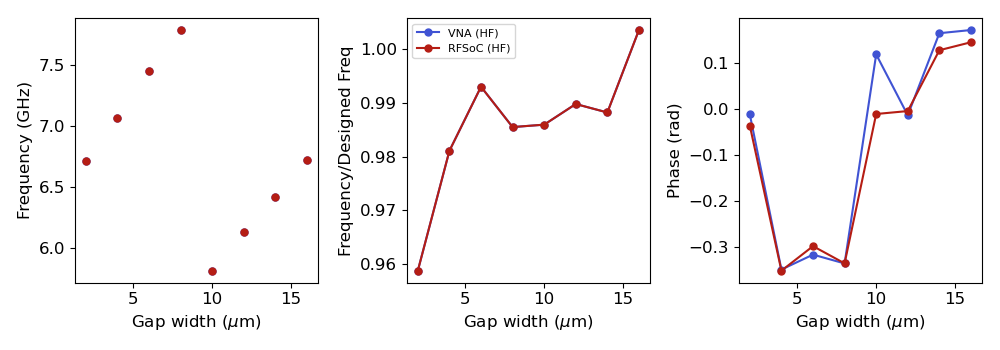

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ana_res.plot_res_pars(plist, labs,img_pth)


## Single resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,3}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ana_res.get_resonators(directories[0],pth, pattern0)

In [ ]:
fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()

In [ ]:
data = ana_res.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ana_res.plot_raw_data(data)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data = ana_res.grab_data(pth+directories[0], file_list[i])       
    ana_res.plot_raw_data(data)
    #output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  
7.714986

In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   
ana_res.plot_raw_data(data)

### Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ana_res.get_temp_list(pth_base, max_temp=1500)
res_params = ana_res.analyze_sweep(directories)

ana_res.plot_power_temp(res_params,i,params,img_pth)